<a class="anchor" id="start">

# `Restaurant Market Basket Analysis`
    
</a>

|      |     Student Name             |     Student ID     | 
|:----:|         :----:               |        :----:      |
|      |      Carolina Mira          |       20220553    | 
|      |      Catarina Alves |       20220680     | 
|      |      Margarida Ferreira      |       20220677     | 
|      |      Mariana Almeida     |       20220381     | 
|      |      Rita Silva      |       20220544    | 
|      |                           **Group F**    

Table of Contents <br>
* [1) Restaurant Market Basket Analysis](#start)
    * [1.1) Dataset Description](#descript)
        * [1.1.1) Restaurant Data](#data)
* [2) Imports](#imports)
    * [2.1) Import Libraries](#importlibraries)
    * [2.2) Import Dataset](#importdataset)
* [3) Data Exploration](#dataexploration)
    * [3.1) Check Data Info](#checkdatainfo)
        * [3.1.1) Change Data Types](#checkdatatypes)
    * [3.2) Descriptive Statistics](#descriptivestatistics)
    * [3.3) Check Duplicates](#checkdup)
    * [3.4) Check Missing Values](#checkmv)
    * [3.5) Check Incoherencies](#coherencechecking)
* [4) Data Preparation](#datapreparation)
    * [4.1) Change str to lower case](#valuelower)
    * [4.2) Fix Incoherencies](#incoherence)
    * [4.3) Treat Missing Values](#mv)
    * [4.4) Aggregate Duplicates](#ad)
    * [4.5) Treat Outliers](#outliers)
        * [4.5.1) Manual Filtering](#manualf)
    * [4.6) Delivery and No Delivery datasets](#devnodev)
* [5) Data Pre-processing](#datapreprocessing)
    * [5.1) Feature Engineering](#featureeng)
        * [5.1.1) Variables Criation](#featureengvc)       
* [6) Data Visualization](#datavisualizatio)
    * [6.1) Products Cloud](#pc)
    * [6.2) Most Frequent Products](#mfp)
    * [6.3) Most Frequent Product Type](#mfpt)
    * [6.4) Frequency of most popular items](#fmpi)
    * [6.5) Less frequent products](#lfp)
    * [6.6) Number of invoice per month](#nim)
    * [6.7) Number of invoice per Hour](#nih)
    * [6.8) Number of invoice per Weekday](#niw)
    * [6.9) Total amount per season delivery vs no delivery](#totalvs)
    * [6.10) Pie Chart of Delivery](#pie)
    * [6.11) Number of invoice per season](#nip) 
    * [6.12) Number of customers per season](#ncs)
    * [6.13) Most frequent products per season](#mfps)
    * [6.14) Number of employees per WeekDay](#new) 
    * [6.15) Most frequent products of delivery orders](#mfpdev)
    * [6.16) Most frequent product type of delivery orders](#mfptdev)
    * [6.17) Most frequent products of in restaurant orders](#mfpres) 
    * [6.18) Most frequent product type of in restaurant orders](#mfptres) 
* [7) Market Basket Analysis - Delivery](#mkbadev)
    * [7.1) Frequent Itemsets](#freqitemdev)
    * [7.2) Association Rules](#asdev)
    * [7.3) Explore Frequent Itemsets](#expdev)
    * [7.4) Substitute Products](#subproddev)
    * [7.5) Network Graph](#dgdev)
* [8) Market Basket Analysis - No Delivery](#mkbanodev)
    * [8.1) Frequent Itemsets](#freqitemnodev)
    * [8.2) Association Rules](#asnodev)
    * [8.3) Explore Frequent Itemsets](#expnodev)
    * [8.4) Substitute Products](#subproddev)
    * [8.5) Network Graph](#dgnodev)   
* [9) References](#ref)

<a class="anchor" id="descript">

## `Dataset Description`
    
</a>


This dataset comprises data from all sales transactions made in one of the most popular restaurants of the chain in Nicosia, the capital of Cyprus. 
The dataset includes information about the items,
including quantities and prices, as well as some customer details.

<a class="anchor" id="data">

### `Restaurant data`
    
</a>

- **ID**: Customer ID
- **DocNumber** : number of the document. The document number repeats in as many rows as the rows in the original document (invoice)
- **ProductDesignation**: product designation
- **ProductFamily**: name of the family of the product. A product can only be member of one only family
- **Qty**: quantity
- **TotalAmount**: sale price of the total quantity
- **InvoiceDateHour**: date and hour when the document was issued
- **EmployeeID**: ID of the employee who issued the document
- **IsDelivery**: indication if sale was a delivery or a dine-inn (1: delivery, 0: dine-inn)
- **Pax**: number of persons at the table
- **CustomerID**: ID of the customer (if a customer record was assigned to the sale)
- **CustomerCity**: city of the customer (usually only employed in delivery)
- **CustomerSince**: date of creation of the customer

<a class="anchor" id="imports">

# `Imports`
    
</a>

<a class="anchor" id="importlibraries">

__`2.1 Import Libraries`__ 
    
</a>

In [1]:
#!pip install wordcloud
#!pip install mlxtend

In [2]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from math import ceil
from wordcloud import WordCloud, STOPWORDS
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import plotly.graph_objects as go
import holidays
import networkx as nx

<a class="anchor" id="importdataset">

__`2.2 Import Dataset`__ 
    
</a>

In [3]:
ds_rest = pd.read_csv('Case2_AsianRestaurant_Cyprus_2018.txt',delimiter = ";")
ds_rest

DocNumber           ProductDesignation ProductFamily  Qty  \
0      TKD0320000012018                     1/2 DUCK      STARTERS  1.0   
1      TKD0320000012018                  SPRING ROLL      STARTERS  8.0   
2      TKD0320000012018           SWEET SOUR CHICKEN          MEAT  2.0   
3      TKD0320000012018                LEMON CHICKEN          MEAT  1.0   
4      TKD0320000012018                     BEEF BBS      SIZZLING  1.0   
...                 ...                          ...           ...  ...   
84104   TK0110054642018           SWEET SOUR CHICKEN          MEAT  1.0   
84105   TK0110054642018                         COKE        DRINKS  1.0   
84106   TK0110054642018               EGG FRIED RICE          RICE  1.0   
84107   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   
84108   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   

      TotalAmount          InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
0           27,10  2018-01-01 19:12:12.000           2           1    1   
1           17,60  2018-01-01 19:12:12.000           2           1    1   
2           20,20  2018-01-01 19:12:12.000           2           1    1   
3           10,10  2018-01-01 19:12:12.000           2           1    1   
4           12,60  2018-01-01 19:12:12.000           2           1    1   
...           ...                      ...         ...         ...  ...   
84104       12,60  2018-12-31 22:45:17.000           2           0    9   
84105        3,00  2018-12-31 22:45:17.000           2           0    9   
84106        6,90  2018-12-31 22:45:17.000           2           0    9   
84107        0,00  2018-12-31 22:45:17.000           2           0    9   
84108        0,00  2018-12-31 22:45:17.000           2           0    9   

       CustomerID CustomerCity CustomerSince  
0           53908     LEYKOSIA           NaN  
1           53908     LEYKOSIA           NaN  
2           53908     LEYKOSIA           NaN  
3           53908     LEYKOSIA           NaN  
4           53908     LEYKOSIA           NaN  
...           ...          ...           ...  
84104           0          NaN           NaN  
84105           0          NaN           NaN  
84106           0          NaN           NaN  
84107           0          NaN           NaN  
84108           0          NaN           NaN  

[84109 rows x 12 columns]

> The dataset is composed of **84109** observations and **12** variables. 

In [4]:
#ds_rest_products = pd.read_csv('Case2_AsianRestaurant_Cyprus_2018_partial.txt',delimiter = ";")
#ds_rest_products

In [5]:
#dataset copy
ds_rest_original = ds_rest.copy()

<a class="anchor" id="dataexploration">

# `Data Exploration`
    
</a>


<a class="anchor" id="checkdatainfo">

__`3.1 Check Data Info`__ 
    
</a>

In [6]:
ds_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84109 entries, 0 to 84108
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DocNumber           84109 non-null  object 
 1   ProductDesignation  84109 non-null  object 
 2   ProductFamily       84109 non-null  object 
 3   Qty                 84109 non-null  float64
 4   TotalAmount         84109 non-null  object 
 5   InvoiceDateHour     84109 non-null  object 
 6   EmployeeID          84109 non-null  int64  
 7   IsDelivery          84109 non-null  int64  
 8   Pax                 84109 non-null  int64  
 9   CustomerID          84109 non-null  int64  
 10  CustomerCity        31248 non-null  object 
 11  CustomerSince       29142 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 7.7+ MB


> 1. The variable ***Total Amount*** is an object variable not a float.
>
> 2. The variables ***InvoiceDateHour*** and ***CustomerSince*** are not in date time type.
>
> 3. The variables **CustomerCity** and **CustomerSince** have missing values

<a class="anchor" id="checkdatatypes">

__`3.1.1 Change Data Types`__ 
    
</a>

> Change data types of:
>1. **InvoiceDateHour** and **CustomerSince** to Date time
>2. **Total Amount** to float

In [7]:
ds_rest[["InvoiceDateHour", "CustomerSince"]] = ds_rest[["InvoiceDateHour", "CustomerSince"]].apply(pd.to_datetime)

In [8]:
ds_rest['TotalAmount'] = ds_rest['TotalAmount'].str.replace(',', '.')
ds_rest['TotalAmount'] = ds_rest['TotalAmount'].astype(float)

<a class="anchor" id="descriptivestatistics">

__`3.2 Descriptive Statistics`__ 
    
</a>

In [9]:
#check descriptive statistics for numerical variables
ds_rest.describe().T

count          mean           std  min  25%  50%      75%  \
Qty          84109.0      1.261256      0.923780  1.0  1.0  1.0      1.0   
TotalAmount  84109.0      9.831420     20.656789  0.0  3.0  6.9     12.6   
EmployeeID   84109.0      3.591221      3.682017  2.0  2.0  2.0      5.0   
IsDelivery   84109.0      0.371518      0.483213  0.0  0.0  0.0      1.0   
Pax          84109.0      3.300800      3.693792  0.0  1.0  2.0      4.0   
CustomerID   84109.0  12633.065760  21952.076038  0.0  0.0  0.0  16429.0   

                 max  
Qty             53.0  
TotalAmount   3000.0  
EmployeeID      27.0  
IsDelivery       1.0  
Pax            200.0  
CustomerID   69101.0

In [10]:
#check descriptive statistics for categorical variables
ds_rest.describe(include = ['O']).T

count unique                  top   freq
DocNumber           84109  11147      TK0110053522018     46
ProductDesignation  84109    255  MINERAL WATER 1.5LT   7061
ProductFamily       84109     27             STARTERS  14148
CustomerCity        31248     17               EGKOMI   9423

> By looking for summary statistics we can notice a priori some problems in the dataset: 
>1. The varibles ***TotalAmount***, ***Pax***, **Qty** probably have outliers because the maximums values are quite high compared to the 75th percentile.
>2. The variable **CustomerCity** has missing values

<a class="anchor" id="checkdup">

__`3.3 Check Duplicates `__ 
    
</a>

In [11]:
ds_rest.duplicated().sum()

3923

In [12]:
ds_rest.loc[ds_rest.duplicated(), :]

DocNumber           ProductDesignation ProductFamily  Qty  \
5      TKD0320000012018                     BEEF BBS      SIZZLING  1.0   
104    TKD0320000162018               EGG FRIED RICE          RICE  1.0   
160     TK0110000022018               CARLSBERG 33CL       SPIRITS  1.0   
161     TK0110000022018               CARLSBERG 33CL       SPIRITS  1.0   
176     TK0110000042018          MINERAL WATER 1.5LT        DRINKS  1.0   
...                 ...                          ...           ...  ...   
84063   TK0110054612018                          KEO       SPIRITS  1.0   
84065   TK0110054612018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   
84089   TK0110054632018          PETRITIS KYPEROUNDA    WHITE WINE  1.0   
84091   TK0110054632018          MINERAL WATER 1.5LT        DRINKS  1.0   
84108   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
5             12.6 2018-01-01 19:12:12           2           1    1   
104            5.5 2018-01-01 21:06:03           2           1    1   
160            3.4 2018-01-01 21:53:15           2           0    8   
161            3.4 2018-01-01 21:53:15           2           0    8   
176            3.0 2018-01-01 22:27:34           2           0    4   
...            ...                 ...         ...         ...  ...   
84063          3.0 2018-12-31 22:33:01           2           0    7   
84065          0.0 2018-12-31 22:33:01           2           0    7   
84089         20.5 2018-12-31 22:43:59           2           0    7   
84091          3.0 2018-12-31 22:43:59           2           0    7   
84108          0.0 2018-12-31 22:45:17           2           0    9   

       CustomerID CustomerCity           CustomerSince  
5           53908     LEYKOSIA                     NaT  
104         45329     LEYKOSIA 2017-11-26 19:35:10.080  
160             0          NaN                     NaT  
161             0          NaN                     NaT  
176             0          NaN                     NaT  
...           ...          ...                     ...  
84063           0          NaN                     NaT  
84065           0          NaN                     NaT  
84089           0          NaN                     NaT  
84091           0          NaN                     NaT  
84108           0          NaN                     NaT  

[3923 rows x 12 columns]

> There are **3923** duplicate observations

* Check Duplicates for **DocNumber**,**CustomerID**

In [13]:
ds_rest.loc[ds_rest.duplicated(subset=['DocNumber','CustomerID'])]

DocNumber           ProductDesignation ProductFamily  Qty  \
1      TKD0320000012018                  SPRING ROLL      STARTERS  8.0   
2      TKD0320000012018           SWEET SOUR CHICKEN          MEAT  2.0   
3      TKD0320000012018                LEMON CHICKEN          MEAT  1.0   
4      TKD0320000012018                     BEEF BBS      SIZZLING  1.0   
5      TKD0320000012018                     BEEF BBS      SIZZLING  1.0   
...                 ...                          ...           ...  ...   
84104   TK0110054642018           SWEET SOUR CHICKEN          MEAT  1.0   
84105   TK0110054642018                         COKE        DRINKS  1.0   
84106   TK0110054642018               EGG FRIED RICE          RICE  1.0   
84107   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   
84108   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
1             17.6 2018-01-01 19:12:12           2           1    1   
2             20.2 2018-01-01 19:12:12           2           1    1   
3             10.1 2018-01-01 19:12:12           2           1    1   
4             12.6 2018-01-01 19:12:12           2           1    1   
5             12.6 2018-01-01 19:12:12           2           1    1   
...            ...                 ...         ...         ...  ...   
84104         12.6 2018-12-31 22:45:17           2           0    9   
84105          3.0 2018-12-31 22:45:17           2           0    9   
84106          6.9 2018-12-31 22:45:17           2           0    9   
84107          0.0 2018-12-31 22:45:17           2           0    9   
84108          0.0 2018-12-31 22:45:17           2           0    9   

       CustomerID CustomerCity CustomerSince  
1           53908     LEYKOSIA           NaT  
2           53908     LEYKOSIA           NaT  
3           53908     LEYKOSIA           NaT  
4           53908     LEYKOSIA           NaT  
5           53908     LEYKOSIA           NaT  
...           ...          ...           ...  
84104           0          NaN           NaT  
84105           0          NaN           NaT  
84106           0          NaN           NaT  
84107           0          NaN           NaT  
84108           0          NaN           NaT  

[72962 rows x 12 columns]

In [14]:
ds_rest.columns

Index(['DocNumber', 'ProductDesignation', 'ProductFamily', 'Qty',
       'TotalAmount', 'InvoiceDateHour', 'EmployeeID', 'IsDelivery', 'Pax',
       'CustomerID', 'CustomerCity', 'CustomerSince'],
      dtype='object')

In [15]:
ds_rest.shape

(84109, 12)

In [16]:
ds_rest[ds_rest.duplicated()]

for col in ds_rest:
    print("________________________")
    print(col, ds_rest[col].value_counts().count(), "unique values")
    print("________________________")
    print(ds_rest[col].value_counts())

________________________
DocNumber 11147 unique values
________________________
TK0110053522018     46
TK0110044742018     46
TK0110007092018     41
TK0110054302018     40
TK0110016132018     37
                    ..
TK0110027822018      1
TK0110018762018      1
TK0120008042018      1
TKD0320010342018     1
TKD0320033622018     1
Name: DocNumber, Length: 11147, dtype: int64
________________________
ProductDesignation 255 unique values
________________________
MINERAL WATER 1.5LT      7061
EGG FRIED RICE           4604
SPRING ROLL              4079
DELIVERY CHARGE          3892
SWEET SOUR CHICKEN       3616
                         ... 
CLASSIC ROLLS VEG           1
BABATZIM ERODIOS ROSE       1
VEUVE CLICQUOT              1
HADJIMICHALI LEFKOS         1
 NO BABY CORN               1
Name: ProductDesignation, Length: 255, dtype: int64
________________________
ProductFamily 27 unique values
________________________
STARTERS       14148
DRINKS         11585
RICE           10720
MEAT     

<a class="anchor" id="checkmv">

__`3.4 Check Missing Values`__ 
    
</a>

In [17]:
print(ds_rest.isnull().sum())

DocNumber                 0
ProductDesignation        0
ProductFamily             0
Qty                       0
TotalAmount               0
InvoiceDateHour           0
EmployeeID                0
IsDelivery                0
Pax                       0
CustomerID                0
CustomerCity          52861
CustomerSince         54967
dtype: int64


In [18]:
for col in ds_rest.columns:
    pct_missing = np.mean(ds_rest[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

DocNumber - 0.0%
ProductDesignation - 0.0%
ProductFamily - 0.0%
Qty - 0.0%
TotalAmount - 0.0%
InvoiceDateHour - 0.0%
EmployeeID - 0.0%
IsDelivery - 0.0%
Pax - 0.0%
CustomerID - 0.0%
CustomerCity - 62.85%
CustomerSince - 65.35%


> The variables ***CustomerCity*** and ***CustomerSince*** have a high percentage of missing values, which should be discarded or imputed later.

<a class="anchor" id="coherencechecking">

__`3.5. Check Incoherences `__ 
    
</a>

In [19]:
ds_rest.head()

DocNumber  ProductDesignation ProductFamily  Qty  TotalAmount  \
0  TKD0320000012018            1/2 DUCK      STARTERS  1.0         27.1   
1  TKD0320000012018         SPRING ROLL      STARTERS  8.0         17.6   
2  TKD0320000012018  SWEET SOUR CHICKEN          MEAT  2.0         20.2   
3  TKD0320000012018       LEMON CHICKEN          MEAT  1.0         10.1   
4  TKD0320000012018            BEEF BBS      SIZZLING  1.0         12.6   

      InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID CustomerCity  \
0 2018-01-01 19:12:12           2           1    1       53908     LEYKOSIA   
1 2018-01-01 19:12:12           2           1    1       53908     LEYKOSIA   
2 2018-01-01 19:12:12           2           1    1       53908     LEYKOSIA   
3 2018-01-01 19:12:12           2           1    1       53908     LEYKOSIA   
4 2018-01-01 19:12:12           2           1    1       53908     LEYKOSIA   

  CustomerSince  
0           NaT  
1           NaT  
2           NaT  
3           NaT  
4           NaT

In [20]:
ds_rest[ds_rest.duplicated()]

for col in ds_rest:
    print("________________________")
    print(col, ds_rest[col].value_counts().count(), "unique values")
    print("________________________")
    print(ds_rest[col].value_counts())

________________________
DocNumber 11147 unique values
________________________
TK0110053522018     46
TK0110044742018     46
TK0110007092018     41
TK0110054302018     40
TK0110016132018     37
                    ..
TK0110027822018      1
TK0110018762018      1
TK0120008042018      1
TKD0320010342018     1
TKD0320033622018     1
Name: DocNumber, Length: 11147, dtype: int64
________________________
ProductDesignation 255 unique values
________________________
MINERAL WATER 1.5LT      7061
EGG FRIED RICE           4604
SPRING ROLL              4079
DELIVERY CHARGE          3892
SWEET SOUR CHICKEN       3616
                         ... 
CLASSIC ROLLS VEG           1
BABATZIM ERODIOS ROSE       1
VEUVE CLICQUOT              1
HADJIMICHALI LEFKOS         1
 NO BABY CORN               1
Name: ProductDesignation, Length: 255, dtype: int64
________________________
ProductFamily 27 unique values
________________________
STARTERS       14148
DRINKS         11585
RICE           10720
MEAT     

* Number of **Pax** equal to zero
> Firstly we thought this could be an inconsistence, although now we don't consider this as an error, since the number of people can be relevant to know how many chopsticks to put in the delivery bag.

In [21]:
(ds_rest['Pax'] == 0).value_counts()

False    84057
True        52
Name: Pax, dtype: int64

In [22]:
(ds_rest['IsDelivery'] == 0).value_counts()

True     52861
False    31248
Name: IsDelivery, dtype: int64

In [23]:
((ds_rest['Pax'] == 0) & (ds_rest['IsDelivery'] == 0)).value_counts()

False    84057
True        52
dtype: int64

In [24]:
((ds_rest['Pax'] != 0) & (ds_rest['IsDelivery'] == 1)).value_counts()

False    52861
True     31248
dtype: int64

* Date Incoherences

In [25]:
ds_rest[(ds_rest['CustomerSince'] > ds_rest['InvoiceDateHour'])]

DocNumber    ProductDesignation ProductFamily  Qty  TotalAmount  \
183    TKD0320000242018              1/4 DUCK      STARTERS  1.0        15.80   
184    TKD0320000242018           SPRING ROLL      STARTERS  2.0         4.40   
185    TKD0320000242018    SWEET SOUR CHICKEN          MEAT  1.0        10.10   
186    TKD0320000242018  NOODLES BEAN SPROUTS          RICE  1.0         6.70   
187    TKD0320000242018       DELIVERY CHARGE        EXTRAS  1.0         1.00   
...                 ...                   ...           ...  ...          ...   
83845  TKD0320044322018          STEAMED RICE          RICE  2.0         8.80   
83846  TKD0320044322018         SPICY NOODLES          RICE  1.0         7.60   
83847  TKD0320044322018       CALIFORNIA MAKI     JAP SUSHI  1.0         7.20   
83848  TKD0320044322018                TSANTA       TSANTES  1.0         0.06   
83849  TKD0320044322018       DELIVERY CHARGE        EXTRAS  1.0         1.00   

          InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  \
183   2018-01-02 19:09:54           2           1    1       14646   
184   2018-01-02 19:09:54           2           1    1       14646   
185   2018-01-02 19:09:54           2           1    1       14646   
186   2018-01-02 19:09:54           2           1    1       14646   
187   2018-01-02 19:09:54           2           1    1       14646   
...                   ...         ...         ...  ...         ...   
83845 2018-12-31 19:46:49           2           1    1        6048   
83846 2018-12-31 19:46:49           2           1    1        6048   
83847 2018-12-31 19:46:49           2           1    1        6048   
83848 2018-12-31 19:46:49           2           1    1        6048   
83849 2018-12-31 19:46:49           2           1    1        6048   

      CustomerCity           CustomerSince  
183     LAKATAMEIA 2019-06-27 20:30:02.223  
184     LAKATAMEIA 2019-06-27 20:30:02.223  
185     LAKATAMEIA 2019-06-27 20:30:02.223  
186     LAKATAMEIA 2019-06-27 20:30:02.223  
187     LAKATAMEIA 2019-06-27 20:30:02.223  
...            ...                     ...  
83845       EGKOMI 2019-02-22 19:38:50.667  
83846       EGKOMI 2019-02-22 19:38:50.667  
83847       EGKOMI 2019-02-22 19:38:50.667  
83848       EGKOMI 2019-02-22 19:38:50.667  
83849       EGKOMI 2019-02-22 19:38:50.667  

[916 rows x 12 columns]

> We have **916** customers that made a purchase before being customers at the restaurant, which cannot be possible.

* Binary and category variables

In [26]:
ds_rest.shape

(84109, 12)

In [27]:
for col in ds_rest:
    print("________________________")
    print(col, ds_rest[col].value_counts().count(), "unique values")
    print("________________________")
    print(ds_rest[col].value_counts())

________________________
DocNumber 11147 unique values
________________________
TK0110053522018     46
TK0110044742018     46
TK0110007092018     41
TK0110054302018     40
TK0110016132018     37
                    ..
TK0110027822018      1
TK0110018762018      1
TK0120008042018      1
TKD0320010342018     1
TKD0320033622018     1
Name: DocNumber, Length: 11147, dtype: int64
________________________
ProductDesignation 255 unique values
________________________
MINERAL WATER 1.5LT      7061
EGG FRIED RICE           4604
SPRING ROLL              4079
DELIVERY CHARGE          3892
SWEET SOUR CHICKEN       3616
                         ... 
CLASSIC ROLLS VEG           1
BABATZIM ERODIOS ROSE       1
VEUVE CLICQUOT              1
HADJIMICHALI LEFKOS         1
 NO BABY CORN               1
Name: ProductDesignation, Length: 255, dtype: int64
________________________
ProductFamily 27 unique values
________________________
STARTERS       14148
DRINKS         11585
RICE           10720
MEAT     

> By checking all variables we can see that no binary variables has other values than 0 and 1.
>
> All classes have correct values in category variables

* Outliers Values


In [28]:
#Define metrix and non metric features
metric_features = ['Qty','TotalAmount','Pax']
non_metric_features = ds_rest.columns.drop(metric_features).to_list()

C:\Users\catar\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\catar\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


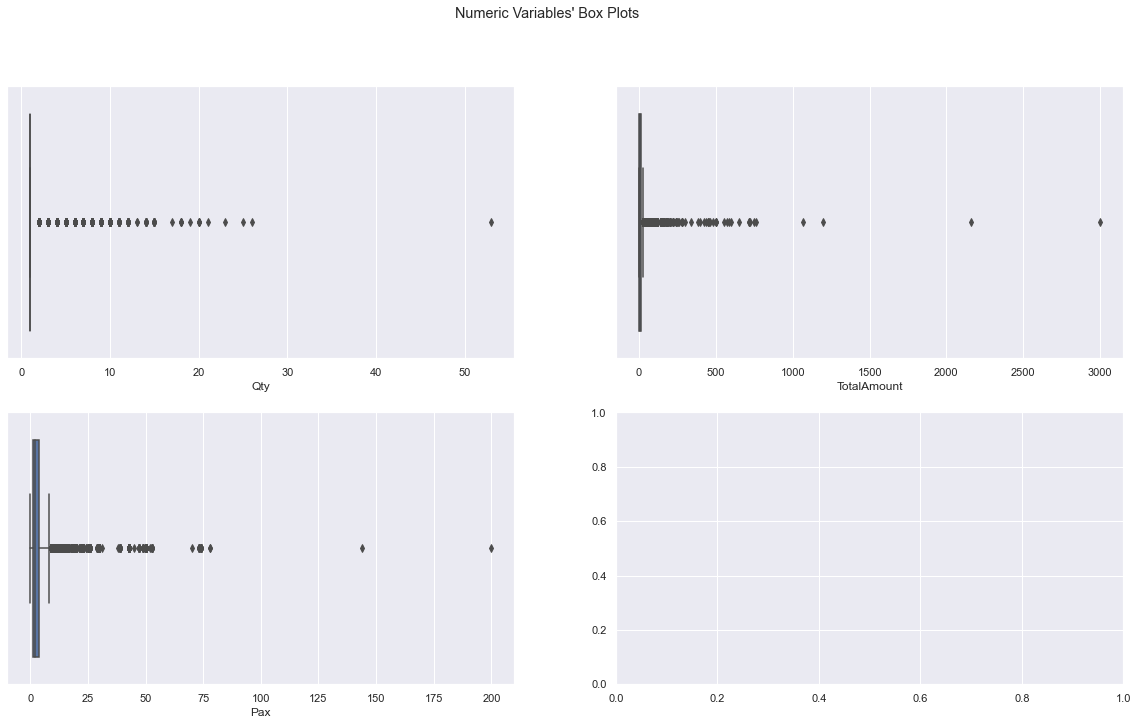

In [29]:
# BOXPLOT (ALL NUMERIC VARIABLES)

sns.set()

#plot data
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=ds_rest[feat], ax=ax)

title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [30]:
ds_rest.loc[ds_rest['TotalAmount'] > 500]

DocNumber ProductDesignation ProductFamily  Qty  TotalAmount  \
1885   TK0110001272018               FOOD         SOUPS  1.0        760.0   
10445  TK0110006752018               FOOD         SOUPS  1.0       1064.0   
16476  TK0110010692018               FOOD         SOUPS  1.0        650.0   
29133  TK0110018792018               FOOD         SOUPS  1.0       1196.0   
37829  TK0110024382018               FOOD         SOUPS  1.0       2160.0   
38099  TK0110024702018               FOOD         SOUPS  1.0        720.0   
55151  TK0110036432018               FOOD         SOUPS  1.0        750.0   
60829  TK0110040832018               FOOD         SOUPS  1.0       3000.0   
70616  TK0110047282018               FOOD         SOUPS  1.0        587.5   
71150  TK0110047722018               FOOD         SOUPS  1.0        552.0   
71807  TK0110047912018               FOOD         SOUPS  1.0        600.0   
72579  TK0110048462018               FOOD         SOUPS  1.0        713.0   
79598  TK0110052322018               FOOD         SOUPS  1.0        713.0   
80613  TK0110052982018               FOOD         SOUPS  1.0        570.0   

          InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  \
1885  2018-01-07 15:20:20           2           0   38           0   
10445 2018-02-10 15:22:36           2           0   70           0   
16476 2018-03-07 15:10:00           2           0   25           0   
29133 2018-04-30 17:16:49           2           0   52           0   
37829 2018-06-12 21:19:59           2           0  144           0   
38099 2018-06-14 20:45:15          27           0   45           0   
55151 2018-09-10 12:10:20           2           0   30           0   
60829 2018-10-04 23:27:13           2           0  200           0   
70616 2018-11-12 23:07:05           2           0   25           0   
71150 2018-11-15 22:29:35           6           0   25           0   
71807 2018-11-17 15:01:12           2           0   30           0   
72579 2018-11-20 23:49:00           2           0   31           0   
79598 2018-12-17 23:24:31           2           0   30           0   
80613 2018-12-21 23:41:50           2           0   19           0   

      CustomerCity CustomerSince  
1885           NaN           NaT  
10445          NaN           NaT  
16476          NaN           NaT  
29133          NaN           NaT  
37829          NaN           NaT  
38099          NaN           NaT  
55151          NaN           NaT  
60829          NaN           NaT  
70616          NaN           NaT  
71150          NaN           NaT  
71807          NaN           NaT  
72579          NaN           NaT  
79598          NaN           NaT  
80613          NaN           NaT

In [31]:
ds_rest.loc[ds_rest['ProductFamily'] == 'SOUPS']

DocNumber ProductDesignation ProductFamily  Qty  TotalAmount  \
54     TKD0320000082018     SWEETCORN SOUP         SOUPS  2.0          9.6   
135     TK0110000012018     SWEETCORN SOUP         SOUPS  2.0         12.0   
188    TKD0320000252018     SWEETCORN SOUP         SOUPS  1.0          4.8   
198    TKD0320000262018               FOOD         SOUPS  1.0         16.0   
224    TKD0320000322018  HOT AND SOUR SOUP         SOUPS  1.0          4.8   
...                 ...                ...           ...  ...          ...   
83570   TK0110054502018               FOOD         SOUPS  1.0          3.0   
83635   TK0120008172018  HOT AND SOUR SOUP         SOUPS  1.0          6.0   
83919  TKD0320044402018     SWEETCORN SOUP         SOUPS  2.0          9.6   
84025   TK0110054592018     SWEETCORN SOUP         SOUPS  1.0          6.0   
84045   TK0110054612018     SWEETCORN SOUP         SOUPS  1.0          6.0   

          InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  \
54    2018-01-01 20:30:05           2           1    1       45487   
135   2018-01-01 21:47:27           2           0    2           0   
188   2018-01-02 19:22:58           2           1    1       45121   
198   2018-01-02 19:23:56           2           1    1        9508   
224   2018-01-02 20:05:34           2           1    1        2546   
...                   ...         ...         ...  ...         ...   
83570 2018-12-30 22:36:47           2           0    6           0   
83635 2018-12-31 20:58:54           5           0    2           0   
83919 2018-12-31 20:31:59           2           1    1       26666   
84025 2018-12-31 22:29:01           2           0    2           0   
84045 2018-12-31 22:33:01           2           0    7           0   

      CustomerCity           CustomerSince  
54        LEYKOSIA 2018-01-01 20:21:27.417  
135            NaN                     NaT  
188         EGKOMI 2017-10-09 20:15:54.127  
198         EGKOMI 2016-12-01 20:06:37.980  
224     LAKATAMEIA 2016-10-21 19:52:09.877  
...            ...                     ...  
83570          NaN                     NaT  
83635          NaN                     NaT  
83919       EGKOMI 2018-12-31 20:09:13.563  
84025          NaN                     NaT  
84045          NaN                     NaT  

[1181 rows x 12 columns]

In [32]:
ds_rest.loc[ds_rest['Pax'] > 75]

DocNumber  ProductDesignation ProductFamily  Qty  TotalAmount  \
1499   TK0110000992018  SWEET SOUR CHICKEN          MEAT  1.0         6.30   
1500   TK0110000992018      EGG FRIED RICE          RICE  1.0         3.45   
37829  TK0110024382018                FOOD         SOUPS  1.0      2160.00   
60829  TK0110040832018                FOOD         SOUPS  1.0      3000.00   

          InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  \
1499  2018-01-06 15:43:24          23           0   78           0   
1500  2018-01-06 15:43:24          23           0   78           0   
37829 2018-06-12 21:19:59           2           0  144           0   
60829 2018-10-04 23:27:13           2           0  200           0   

      CustomerCity CustomerSince  
1499           NaN           NaT  
1500           NaN           NaT  
37829          NaN           NaT  
60829          NaN           NaT

In [33]:
ds_rest.loc[ds_rest['Qty'] > 30]

DocNumber ProductDesignation ProductFamily   Qty  TotalAmount  \
83181  TK0110054302018        SPRING ROLL      STARTERS  53.0        153.7   

          InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  \
83181 2018-12-29 15:43:43           2           0   50           0   

      CustomerCity CustomerSince  
83181          NaN           NaT

* **Qtd** equal to zero and **TotalAmount** > 0

In [34]:
ds_rest.loc[(ds_rest['Qty'] == 0) & (ds_rest['TotalAmount'] > 0) ]

Empty DataFrame
Columns: [DocNumber, ProductDesignation, ProductFamily, Qty, TotalAmount, InvoiceDateHour, EmployeeID, IsDelivery, Pax, CustomerID, CustomerCity, CustomerSince]
Index: []

<a class="anchor" id="datapreparation">

# `Data Preparation`
    
</a>

In [35]:
ds_rest_copy = ds_rest.copy()

In [36]:
ds_rest

DocNumber           ProductDesignation ProductFamily  Qty  \
0      TKD0320000012018                     1/2 DUCK      STARTERS  1.0   
1      TKD0320000012018                  SPRING ROLL      STARTERS  8.0   
2      TKD0320000012018           SWEET SOUR CHICKEN          MEAT  2.0   
3      TKD0320000012018                LEMON CHICKEN          MEAT  1.0   
4      TKD0320000012018                     BEEF BBS      SIZZLING  1.0   
...                 ...                          ...           ...  ...   
84104   TK0110054642018           SWEET SOUR CHICKEN          MEAT  1.0   
84105   TK0110054642018                         COKE        DRINKS  1.0   
84106   TK0110054642018               EGG FRIED RICE          RICE  1.0   
84107   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   
84108   TK0110054642018  TOFFEE BANANA COMPLEMENTARY       DESSERT  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
0             27.1 2018-01-01 19:12:12           2           1    1   
1             17.6 2018-01-01 19:12:12           2           1    1   
2             20.2 2018-01-01 19:12:12           2           1    1   
3             10.1 2018-01-01 19:12:12           2           1    1   
4             12.6 2018-01-01 19:12:12           2           1    1   
...            ...                 ...         ...         ...  ...   
84104         12.6 2018-12-31 22:45:17           2           0    9   
84105          3.0 2018-12-31 22:45:17           2           0    9   
84106          6.9 2018-12-31 22:45:17           2           0    9   
84107          0.0 2018-12-31 22:45:17           2           0    9   
84108          0.0 2018-12-31 22:45:17           2           0    9   

       CustomerID CustomerCity CustomerSince  
0           53908     LEYKOSIA           NaT  
1           53908     LEYKOSIA           NaT  
2           53908     LEYKOSIA           NaT  
3           53908     LEYKOSIA           NaT  
4           53908     LEYKOSIA           NaT  
...           ...          ...           ...  
84104           0          NaN           NaT  
84105           0          NaN           NaT  
84106           0          NaN           NaT  
84107           0          NaN           NaT  
84108           0          NaN           NaT  

[84109 rows x 12 columns]

<a class="anchor" id="valuelower">

__`4.1 Change str to lower case `__ 
    
</a>

In [37]:
ds_rest['ProductDesignation'] = ds_rest['ProductDesignation'].str.lower()
ds_rest['ProductFamily'] = ds_rest['ProductFamily'].str.lower()
ds_rest['CustomerCity'] = ds_rest['CustomerCity'].str.lower()

<a class="anchor" id="incoherence">

__`4.2 Fix Incoherencies`__ 
    
</a>

* Date

In [38]:
ds_rest = ds_rest[~(ds_rest['CustomerSince'] > ds_rest['InvoiceDateHour'])]
ds_rest

DocNumber           ProductDesignation ProductFamily  Qty  \
0      TKD0320000012018                     1/2 duck      starters  1.0   
1      TKD0320000012018                  spring roll      starters  8.0   
2      TKD0320000012018           sweet sour chicken          meat  2.0   
3      TKD0320000012018                lemon chicken          meat  1.0   
4      TKD0320000012018                     beef bbs      sizzling  1.0   
...                 ...                          ...           ...  ...   
84104   TK0110054642018           sweet sour chicken          meat  1.0   
84105   TK0110054642018                         coke        drinks  1.0   
84106   TK0110054642018               egg fried rice          rice  1.0   
84107   TK0110054642018  toffee banana complementary       dessert  1.0   
84108   TK0110054642018  toffee banana complementary       dessert  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
0             27.1 2018-01-01 19:12:12           2           1    1   
1             17.6 2018-01-01 19:12:12           2           1    1   
2             20.2 2018-01-01 19:12:12           2           1    1   
3             10.1 2018-01-01 19:12:12           2           1    1   
4             12.6 2018-01-01 19:12:12           2           1    1   
...            ...                 ...         ...         ...  ...   
84104         12.6 2018-12-31 22:45:17           2           0    9   
84105          3.0 2018-12-31 22:45:17           2           0    9   
84106          6.9 2018-12-31 22:45:17           2           0    9   
84107          0.0 2018-12-31 22:45:17           2           0    9   
84108          0.0 2018-12-31 22:45:17           2           0    9   

       CustomerID CustomerCity CustomerSince  
0           53908     leykosia           NaT  
1           53908     leykosia           NaT  
2           53908     leykosia           NaT  
3           53908     leykosia           NaT  
4           53908     leykosia           NaT  
...           ...          ...           ...  
84104           0          NaN           NaT  
84105           0          NaN           NaT  
84106           0          NaN           NaT  
84107           0          NaN           NaT  
84108           0          NaN           NaT  

[83193 rows x 12 columns]

> Drop this values since does not make sense in the context of our project

* Prodcut family

In [39]:
indexProducts = ds_rest[ (ds_rest['ProductDesignation'] == 'delivery charge')].index
ds_rest.drop(indexProducts , inplace=True)
ds_rest.head(15)

C:\Users\catar\AppData\Local\Temp\ipykernel_28856\453240568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_rest.drop(indexProducts , inplace=True)


DocNumber         ProductDesignation ProductFamily  Qty  \
0   TKD0320000012018                   1/2 duck      starters  1.0   
1   TKD0320000012018                spring roll      starters  8.0   
2   TKD0320000012018         sweet sour chicken          meat  2.0   
3   TKD0320000012018              lemon chicken          meat  1.0   
4   TKD0320000012018                   beef bbs      sizzling  1.0   
5   TKD0320000012018                   beef bbs      sizzling  1.0   
6   TKD0320000012018               steamed rice          rice  2.0   
7   TKD0320000012018  special montparnasse rice          rice  1.0   
8   TKD0320000012018          noodles with meat          rice  2.0   
9   TKD0320000012018                    no meat         holds  2.0   
10  TKD0320000012018                        7up        drinks  4.0   
12  TKD0320000022018                   1/4 duck      starters  1.0   
13  TKD0320000022018         salt pepper prawns      starters  1.0   
14  TKD0320000022018                spring roll      starters  2.0   
15  TKD0320000022018              sesame prawns      starters  1.0   

    TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  \
0          27.1 2018-01-01 19:12:12           2           1    1       53908   
1          17.6 2018-01-01 19:12:12           2           1    1       53908   
2          20.2 2018-01-01 19:12:12           2           1    1       53908   
3          10.1 2018-01-01 19:12:12           2           1    1       53908   
4          12.6 2018-01-01 19:12:12           2           1    1       53908   
5          12.6 2018-01-01 19:12:12           2           1    1       53908   
6           8.8 2018-01-01 19:12:12           2           1    1       53908   
7           6.3 2018-01-01 19:12:12           2           1    1       53908   
8          15.8 2018-01-01 19:12:12           2           1    1       53908   
9           0.0 2018-01-01 19:12:12           2           1    1       53908   
10          4.8 2018-01-01 19:12:12           2           1    1       53908   
12         15.8 2018-01-01 19:12:28           2           1    1        1072   
13         13.2 2018-01-01 19:12:28           2           1    1        1072   
14          4.4 2018-01-01 19:12:28           2           1    1        1072   
15          5.4 2018-01-01 19:12:28           2           1    1        1072   

   CustomerCity           CustomerSince  
0      leykosia                     NaT  
1      leykosia                     NaT  
2      leykosia                     NaT  
3      leykosia                     NaT  
4      leykosia                     NaT  
5      leykosia                     NaT  
6      leykosia                     NaT  
7      leykosia                     NaT  
8      leykosia                     NaT  
9      leykosia                     NaT  
10     leykosia                     NaT  
12     leykosia 2016-03-10 20:52:43.220  
13     leykosia 2016-03-10 20:52:43.220  
14     leykosia 2016-03-10 20:52:43.220  
15     leykosia 2016-03-10 20:52:43.220

In [40]:
indexProducts = ds_rest[ (ds_rest['ProductDesignation'] == 'tsanta')].index
ds_rest.drop(indexProducts , inplace=True)
ds_rest.head(15)

C:\Users\catar\AppData\Local\Temp\ipykernel_28856\808012521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_rest.drop(indexProducts , inplace=True)


DocNumber         ProductDesignation ProductFamily  Qty  \
0   TKD0320000012018                   1/2 duck      starters  1.0   
1   TKD0320000012018                spring roll      starters  8.0   
2   TKD0320000012018         sweet sour chicken          meat  2.0   
3   TKD0320000012018              lemon chicken          meat  1.0   
4   TKD0320000012018                   beef bbs      sizzling  1.0   
5   TKD0320000012018                   beef bbs      sizzling  1.0   
6   TKD0320000012018               steamed rice          rice  2.0   
7   TKD0320000012018  special montparnasse rice          rice  1.0   
8   TKD0320000012018          noodles with meat          rice  2.0   
9   TKD0320000012018                    no meat         holds  2.0   
10  TKD0320000012018                        7up        drinks  4.0   
12  TKD0320000022018                   1/4 duck      starters  1.0   
13  TKD0320000022018         salt pepper prawns      starters  1.0   
14  TKD0320000022018                spring roll      starters  2.0   
15  TKD0320000022018              sesame prawns      starters  1.0   

    TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  \
0          27.1 2018-01-01 19:12:12           2           1    1       53908   
1          17.6 2018-01-01 19:12:12           2           1    1       53908   
2          20.2 2018-01-01 19:12:12           2           1    1       53908   
3          10.1 2018-01-01 19:12:12           2           1    1       53908   
4          12.6 2018-01-01 19:12:12           2           1    1       53908   
5          12.6 2018-01-01 19:12:12           2           1    1       53908   
6           8.8 2018-01-01 19:12:12           2           1    1       53908   
7           6.3 2018-01-01 19:12:12           2           1    1       53908   
8          15.8 2018-01-01 19:12:12           2           1    1       53908   
9           0.0 2018-01-01 19:12:12           2           1    1       53908   
10          4.8 2018-01-01 19:12:12           2           1    1       53908   
12         15.8 2018-01-01 19:12:28           2           1    1        1072   
13         13.2 2018-01-01 19:12:28           2           1    1        1072   
14          4.4 2018-01-01 19:12:28           2           1    1        1072   
15          5.4 2018-01-01 19:12:28           2           1    1        1072   

   CustomerCity           CustomerSince  
0      leykosia                     NaT  
1      leykosia                     NaT  
2      leykosia                     NaT  
3      leykosia                     NaT  
4      leykosia                     NaT  
5      leykosia                     NaT  
6      leykosia                     NaT  
7      leykosia                     NaT  
8      leykosia                     NaT  
9      leykosia                     NaT  
10     leykosia                     NaT  
12     leykosia 2016-03-10 20:52:43.220  
13     leykosia 2016-03-10 20:52:43.220  
14     leykosia 2016-03-10 20:52:43.220  
15     leykosia 2016-03-10 20:52:43.220

In [41]:
ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('new sushi','sushi')
ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('jap sushi','sushi')
ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('rice ind','rice')
ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('start ind','starters')
ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('veg ind','veg')
ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('dessert ind','dessert')

C:\Users\catar\AppData\Local\Temp\ipykernel_28856\1515765752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('new sushi','sushi')
C:\Users\catar\AppData\Local\Temp\ipykernel_28856\1515765752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_rest['ProductFamily'] = ds_rest['ProductFamily'].replace('jap sushi','sushi')
C:\Users\catar\AppData\Local\Temp\ipykernel_28856\1515765752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

> Drop some categories that are not food products like delivery charge and tsanta (bags)
>
> Join similar categories like sushi, new suhsi and jap sushi

<a class="anchor" id="mv">

__`4.3 Treat Missing Values`__ 
    
</a>

In [42]:
# Missing values CustomerCity, CustomerSince
ds_rest = ds_rest.drop(columns = ['CustomerCity','CustomerSince'])

> We decided to remove the variables  **CustomerCity** and **CustomerSince** because they have more than 60% of missing valuess

<a class="anchor" id="ad">

__`4.4 Aggregate Duplicates`__ 
    
</a>

In [43]:
ds_rest.loc[ds_rest.duplicated(), :]

DocNumber           ProductDesignation ProductFamily  Qty  \
5      TKD0320000012018                     beef bbs      sizzling  1.0   
104    TKD0320000162018               egg fried rice          rice  1.0   
160     TK0110000022018               carlsberg 33cl       spirits  1.0   
161     TK0110000022018               carlsberg 33cl       spirits  1.0   
176     TK0110000042018          mineral water 1.5lt        drinks  1.0   
...                 ...                          ...           ...  ...   
84063   TK0110054612018                          keo       spirits  1.0   
84065   TK0110054612018  toffee banana complementary       dessert  1.0   
84089   TK0110054632018          petritis kyperounda    white wine  1.0   
84091   TK0110054632018          mineral water 1.5lt        drinks  1.0   
84108   TK0110054642018  toffee banana complementary       dessert  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
5             12.6 2018-01-01 19:12:12           2           1    1   
104            5.5 2018-01-01 21:06:03           2           1    1   
160            3.4 2018-01-01 21:53:15           2           0    8   
161            3.4 2018-01-01 21:53:15           2           0    8   
176            3.0 2018-01-01 22:27:34           2           0    4   
...            ...                 ...         ...         ...  ...   
84063          3.0 2018-12-31 22:33:01           2           0    7   
84065          0.0 2018-12-31 22:33:01           2           0    7   
84089         20.5 2018-12-31 22:43:59           2           0    7   
84091          3.0 2018-12-31 22:43:59           2           0    7   
84108          0.0 2018-12-31 22:45:17           2           0    9   

       CustomerID  
5           53908  
104         45329  
160             0  
161             0  
176             0  
...           ...  
84063           0  
84065           0  
84089           0  
84091           0  
84108           0  

[3865 rows x 10 columns]

In [44]:
ds_rest_groupby = ds_rest.groupby(['DocNumber','ProductDesignation','ProductFamily','InvoiceDateHour','EmployeeID','IsDelivery','Pax','CustomerID'],as_index=False).agg(DocNumber = ('DocNumber','first'),
                                    ProductDesignation = ('ProductDesignation','first'),
                                       ProductFamily = ('ProductFamily','first'),
                                       Qty = ('Qty','sum'),
                                       TotalAmount = ('TotalAmount','sum'),
                                       InvoiceDateHour = ('InvoiceDateHour','first'),
                                       EmployeeID = ('EmployeeID','first'),
                                       IsDelivery = ('IsDelivery','first'),
                                       Pax = ('Pax','first'),
                                       CustomerID = ('CustomerID','first')).reset_index(drop=True)

In [45]:
ds_rest = ds_rest_groupby.copy()

<a class="anchor" id="outliers">

__`4.5 Treat Outliers`__ 
    
</a>

In [46]:
#Define metrix and non metric features
metric_features = ['Qty','TotalAmount','Pax']
non_metric_features = ds_rest.columns.drop(metric_features).to_list()

C:\Users\catar\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\catar\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


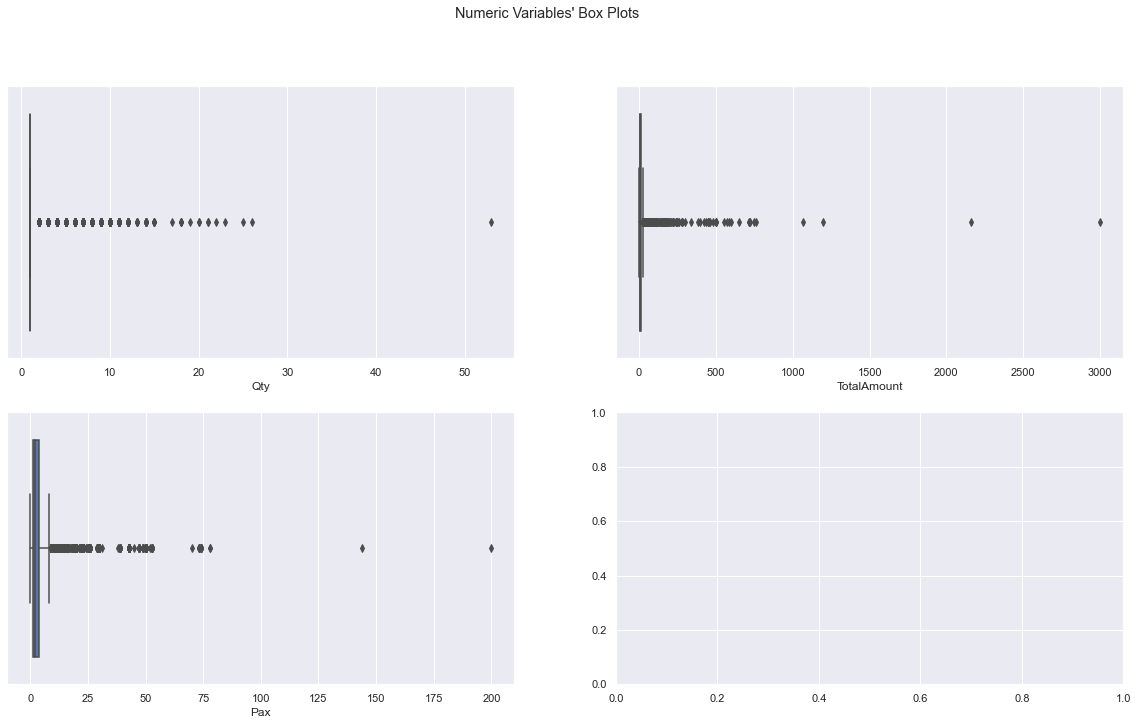

In [47]:
# BOXPLOT (ALL NUMERIC VARIABLES)

sns.set()

#plot data
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=ds_rest[feat], ax=ax)

title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [48]:
ds_rest.loc[ds_rest['TotalAmount'] > 500]

DocNumber ProductDesignation ProductFamily  Qty  TotalAmount  \
1034   TK0110001272018               food         soups  1.0        760.0   
5542   TK0110006752018               food         soups  1.0       1064.0   
8826   TK0110010692018               food         soups  1.0        650.0   
15413  TK0110018792018               food         soups  1.0       1196.0   
19773  TK0110024382018               food         soups  1.0       2160.0   
19911  TK0110024702018               food         soups  1.0        720.0   
28747  TK0110036432018               food         soups  1.0        750.0   
31976  TK0110040832018               food         soups  1.0       3000.0   
36944  TK0110047282018               food         soups  1.0        587.5   
37203  TK0110047722018               food         soups  1.0        552.0   
37380  TK0110047912018               food         soups  1.0        600.0   
37885  TK0110048462018               food         soups  1.0        713.0   
40954  TK0110052322018               food         soups  1.0        713.0   
41458  TK0110052982018               food         soups  1.0        570.0   

          InvoiceDateHour  EmployeeID  IsDelivery  Pax  CustomerID  
1034  2018-01-07 15:20:20           2           0   38           0  
5542  2018-02-10 15:22:36           2           0   70           0  
8826  2018-03-07 15:10:00           2           0   25           0  
15413 2018-04-30 17:16:49           2           0   52           0  
19773 2018-06-12 21:19:59           2           0  144           0  
19911 2018-06-14 20:45:15          27           0   45           0  
28747 2018-09-10 12:10:20           2           0   30           0  
31976 2018-10-04 23:27:13           2           0  200           0  
36944 2018-11-12 23:07:05           2           0   25           0  
37203 2018-11-15 22:29:35           6           0   25           0  
37380 2018-11-17 15:01:12           2           0   30           0  
37885 2018-11-20 23:49:00           2           0   31           0  
40954 2018-12-17 23:24:31           2           0   30           0  
41458 2018-12-21 23:41:50           2           0   19           0

<a class="anchor" id="manualf">

__`4.5.1 Manual Filtering`__ 
    
</a>

In [50]:
aux= ds_rest.copy()
filter3 = (
    (aux['TotalAmount'] < 500)
    &
    (aux['Pax'] < 100)
    &
    (aux['Qty'] < 30)
        
)

ds_rest_filter3 = aux[filter3]
outliers3= aux[~filter3]
print('Percentage of data kept after removing outliers:', np.round(ds_rest_filter3.shape[0] / ds_rest.shape[0], 4))

Percentage of data kept after removing outliers: 0.9998


> We remove **0.0002%** of the data corresoponding to **18** records by treating outliers

C:\Users\catar\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\catar\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


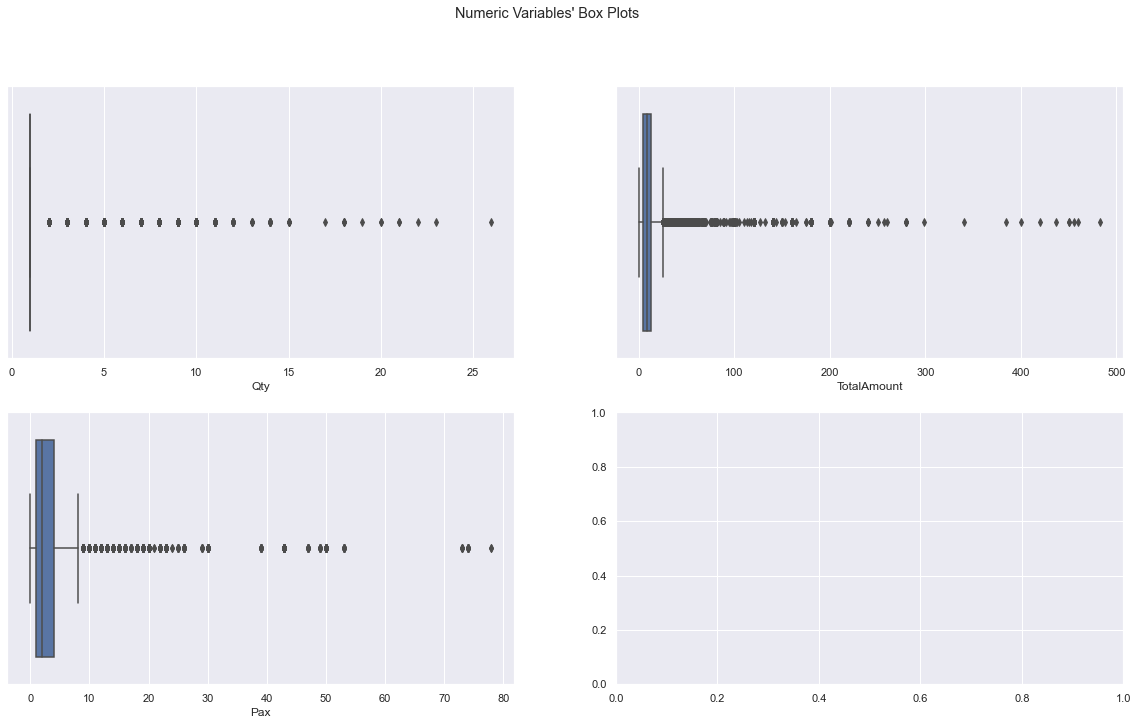

In [53]:
# BOXPLOT (ALL NUMERIC VARIABLES)

sns.set()

#plot data
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=ds_rest_filter3[feat], ax=ax)

title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [54]:
ds_rest = ds_rest_filter3.copy()

<a class="anchor" id="devnodev">

__`4.6 Delivery and No Delivery datasets`__ 
    
</a>

> Create a dataset for **Delivery** and **No Delivery**

In [56]:
ds_rest_delivery = ds_rest.loc[((ds_rest['IsDelivery'] == 1 ))]

ds_rest_delivery

DocNumber        ProductDesignation ProductFamily  Qty  \
48888  TKD0310000012018  chicken mixed vegetables          meat  1.0   
48889  TKD0310000012018            egg fried rice          rice  1.0   
48890  TKD0310000012018              mix veg maki         sushi  1.0   
48891  TKD0310000012018               salmon maki         sushi  1.0   
48892  TKD0310000012018               spring roll      starters  2.0   
...                 ...                       ...           ...  ...   
72938  TKD0320044522018               spring roll      starters  1.0   
72939  TKD0320044522018        sweet sour chicken          meat  1.0   
72940  TKD0320044532018                aloo palak           veg  1.0   
72941  TKD0320044532018                      naan    breads ind  3.0   
72942  TKD0320044532018                    samosa      starters  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
48888         10.1 2018-01-05 20:22:15           6           1    1   
48889          5.5 2018-01-05 20:22:15           6           1    1   
48890          3.6 2018-01-05 20:22:15           6           1    1   
48891          5.0 2018-01-05 20:22:15           6           1    1   
48892          4.4 2018-01-05 20:22:15           6           1    1   
...            ...                 ...         ...         ...  ...   
72938          2.2 2018-12-31 21:55:18           2           1    1   
72939         10.1 2018-12-31 21:55:18           2           1    1   
72940          7.0 2018-12-31 21:55:41           2           1    1   
72941          9.6 2018-12-31 21:55:41           2           1    1   
72942          3.4 2018-12-31 21:55:41           2           1    1   

       CustomerID  
48888        1818  
48889        1818  
48890        1818  
48891        1818  
48892        1818  
...           ...  
72938       33349  
72939       33349  
72940       34071  
72941       34071  
72942       34071  

[24054 rows x 10 columns]

In [57]:
ds_rest_nodelivery = ds_rest.loc[((ds_rest['IsDelivery'] == 0 ))]

ds_rest_nodelivery

DocNumber          ProductDesignation ProductFamily  Qty  \
0      TK0110000012018  boutari moschofilero white    white wine  1.0   
1      TK0110000012018              egg fried rice          rice  1.0   
2      TK0110000012018                  jira pulao          rice  1.0   
3      TK0110000012018             lamb rogan josh      main ind  1.0   
4      TK0110000012018         mineral water 1.5lt        drinks  1.0   
...                ...                         ...           ...  ...   
48883  TK0120008202018           malai mango chick      main ind  1.0   
48884  TK0120008202018         mineral water 1.5lt        drinks  3.0   
48885  TK0120008202018                        naan    breads ind  4.0   
48886  TK0120008202018                steamed rice          rice  2.0   
48887  TK0120008202018          sweet sour chicken          meat  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
0             26.9 2018-01-01 21:47:27           2           0    2   
1              6.9 2018-01-01 21:47:27           2           0    2   
2              6.9 2018-01-01 21:47:27           2           0    2   
3             14.6 2018-01-01 21:47:27           2           0    2   
4              3.0 2018-01-01 21:47:27           2           0    2   
...            ...                 ...         ...         ...  ...   
48883         12.8 2018-12-31 22:05:10           5           0    6   
48884          9.0 2018-12-31 22:05:10           5           0    6   
48885         14.0 2018-12-31 22:05:10           5           0    6   
48886         11.0 2018-12-31 22:05:10           5           0    6   
48887         12.6 2018-12-31 22:05:10           5           0    6   

       CustomerID  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
48883           0  
48884           0  
48885           0  
48886           0  
48887           0  

[48871 rows x 10 columns]

<a class="anchor" id="datapreprocessing">

# `Data Preprocessing`
    
</a>

<a class="anchor" id="featureeng">

__`5.1 Feature Engineering`__ 
    
</a>


<a class="anchor" id="featureengvc">

__`5.1.1 Variables Creation`__ 
    
</a>

* Create new variables from Date: ***Month***, **Day**, **Year**, **Hour**, **Day of the week**

In [58]:
def find_season(month):
    season_month_north = {
        12:'Autumn', 1:'Winter', 2:'Winter',
        3:'Winter', 4:'Spring', 5:'Spring',
        6:'Spring', 7:'Summer', 8:'Summer',
        9:'Summer', 10:'Autumn', 11:'Autumn'}
    return season_month_north.get(month)

def weekday_or_weekend(column):
    if column < 5:
        return "Weekday"
    else:
        return "Weekend"
    


In [59]:
ds_rest['Date'] = ds_rest['InvoiceDateHour'].dt.date

In [60]:
ds_rest['Month'] = ds_rest['InvoiceDateHour'].dt.month
ds_rest['Day'] = ds_rest['InvoiceDateHour'].dt.day
ds_rest['Year'] = ds_rest['InvoiceDateHour'].dt.year
ds_rest['Hour'] = ds_rest['InvoiceDateHour'].dt.hour

In [61]:
ds_rest['Year'].value_counts()

2018    72925
Name: Year, dtype: int64

In [62]:
ds_rest = ds_rest.drop(columns = ['Year'])

In [63]:
ds_rest['WeekDay'] = ds_rest['InvoiceDateHour'].dt.strftime('%A')
ds_rest['WeekDayNumber'] = ds_rest['InvoiceDateHour'].dt.dayofweek
ds_rest['Season'] = ds_rest.Month.apply(find_season)
ds_rest['Time_of_Week'] = ds_rest.WeekDayNumber.apply(weekday_or_weekend)

ds_rest = ds_rest.drop(columns = ['WeekDayNumber'])

In [64]:
# create a list of holidays for Cyprus
cyprus_holidays = holidays.country_holidays('CY')

# create a new column with holiday or day
ds_rest['holiday_or_day'] = ds_rest['InvoiceDateHour'].apply(lambda x: 'holiday' if x in cyprus_holidays else 'Day')

ds_rest

DocNumber          ProductDesignation ProductFamily  Qty  \
0       TK0110000012018  boutari moschofilero white    white wine  1.0   
1       TK0110000012018              egg fried rice          rice  1.0   
2       TK0110000012018                  jira pulao          rice  1.0   
3       TK0110000012018             lamb rogan josh      main ind  1.0   
4       TK0110000012018         mineral water 1.5lt        drinks  1.0   
...                 ...                         ...           ...  ...   
72938  TKD0320044522018                 spring roll      starters  1.0   
72939  TKD0320044522018          sweet sour chicken          meat  1.0   
72940  TKD0320044532018                  aloo palak           veg  1.0   
72941  TKD0320044532018                        naan    breads ind  3.0   
72942  TKD0320044532018                      samosa      starters  1.0   

       TotalAmount     InvoiceDateHour  EmployeeID  IsDelivery  Pax  \
0             26.9 2018-01-01 21:47:27           2           0    2   
1              6.9 2018-01-01 21:47:27           2           0    2   
2              6.9 2018-01-01 21:47:27           2           0    2   
3             14.6 2018-01-01 21:47:27           2           0    2   
4              3.0 2018-01-01 21:47:27           2           0    2   
...            ...                 ...         ...         ...  ...   
72938          2.2 2018-12-31 21:55:18           2           1    1   
72939         10.1 2018-12-31 21:55:18           2           1    1   
72940          7.0 2018-12-31 21:55:41           2           1    1   
72941          9.6 2018-12-31 21:55:41           2           1    1   
72942          3.4 2018-12-31 21:55:41           2           1    1   

       CustomerID        Date  Month  Day  Hour WeekDay  Season Time_of_Week  \
0               0  2018-01-01      1    1    21  Monday  Winter      Weekday   
1               0  2018-01-01      1    1    21  Monday  Winter      Weekday   
2               0  2018-01-01      1    1    21  Monday  Winter      Weekday   
3               0  2018-01-01      1    1    21  Monday  Winter      Weekday   
4               0  2018-01-01      1    1    21  Monday  Winter      Weekday   
...           ...         ...    ...  ...   ...     ...     ...          ...   
72938       33349  2018-12-31     12   31    21  Monday  Autumn      Weekday   
72939       33349  2018-12-31     12   31    21  Monday  Autumn      Weekday   
72940       34071  2018-12-31     12   31    21  Monday  Autumn      Weekday   
72941       34071  2018-12-31     12   31    21  Monday  Autumn      Weekday   
72942       34071  2018-12-31     12   31    21  Monday  Autumn      Weekday   

      holiday_or_day  
0            holiday  
1            holiday  
2            holiday  
3            holiday  
4            holiday  
...              ...  
72938            Day  
72939            Day  
72940            Day  
72941            Day  
72942            Day  

[72925 rows x 18 columns]

In [65]:
#ds_rest.to_csv('ds_rest.csv',index=False)
#ds_rest = pd.read_csv('ds_rest.csv',delimiter = ",")

<a class="anchor" id="datavisualizatio">

# `Data Visualization`
    
</a>

<a class="anchor" id="pc">

__`6.1 Products Cloud`__ 
    
</a>

In [66]:
ds_rest['Product'] = ds_rest['ProductDesignation'].str.replace(' ', '_')
ds_rest['Product'] = ds_rest['Product'].str.replace('.', '_')

C:\Users\catar\AppData\Local\Temp\ipykernel_28856\4266876603.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ds_rest['Product'] = ds_rest['Product'].str.replace('.', '_')


In [67]:
text = " ".join(cat for cat in ds_rest.Product)

In [68]:
 # Generate word cloud
word_cloud = WordCloud(
    width=1500,
    height=1500,
    random_state=1,
    background_color= 'white',
    collocations=False,
    stopwords=STOPWORDS).generate(text)

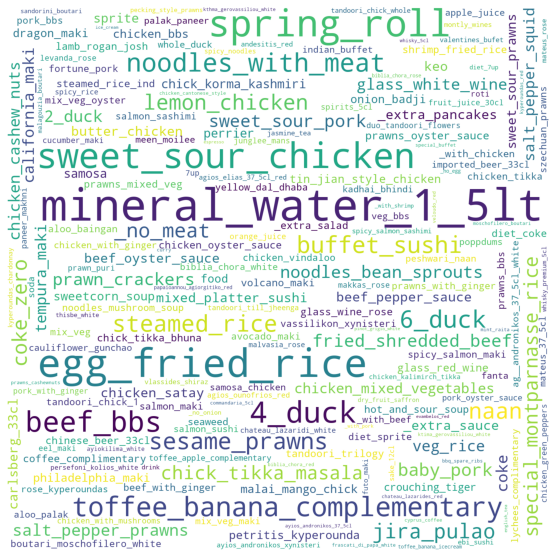

In [69]:
# Display the generated Word Cloud
fig, axes = plt.subplots(figsize=(10, 10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

<a class="anchor" id="mfp">

__`6.2 Most frequent products`__ 
    
</a>

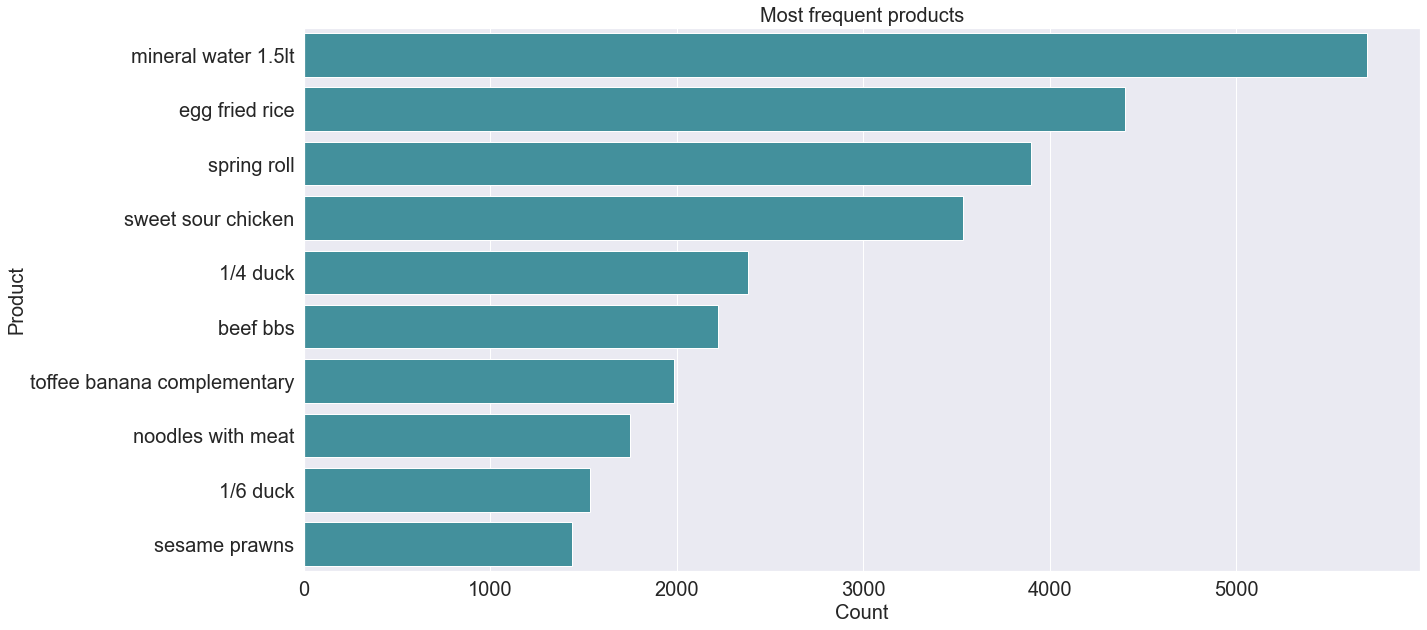

In [70]:
#most frequent values 
fig, axes = plt.subplots(figsize=(20, 10))

b = sns.countplot(y = ds_rest['ProductDesignation'], order=pd.value_counts(ds_rest['ProductDesignation']).iloc[:10].index,color='#349bab')

b.axes.set_title("Most frequent products",fontsize=20)
b.set_xlabel("Count",fontsize=20)
b.set_ylabel("Product",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="mfpt">

__`6.3 Most frequent product type`__ 
    
</a>

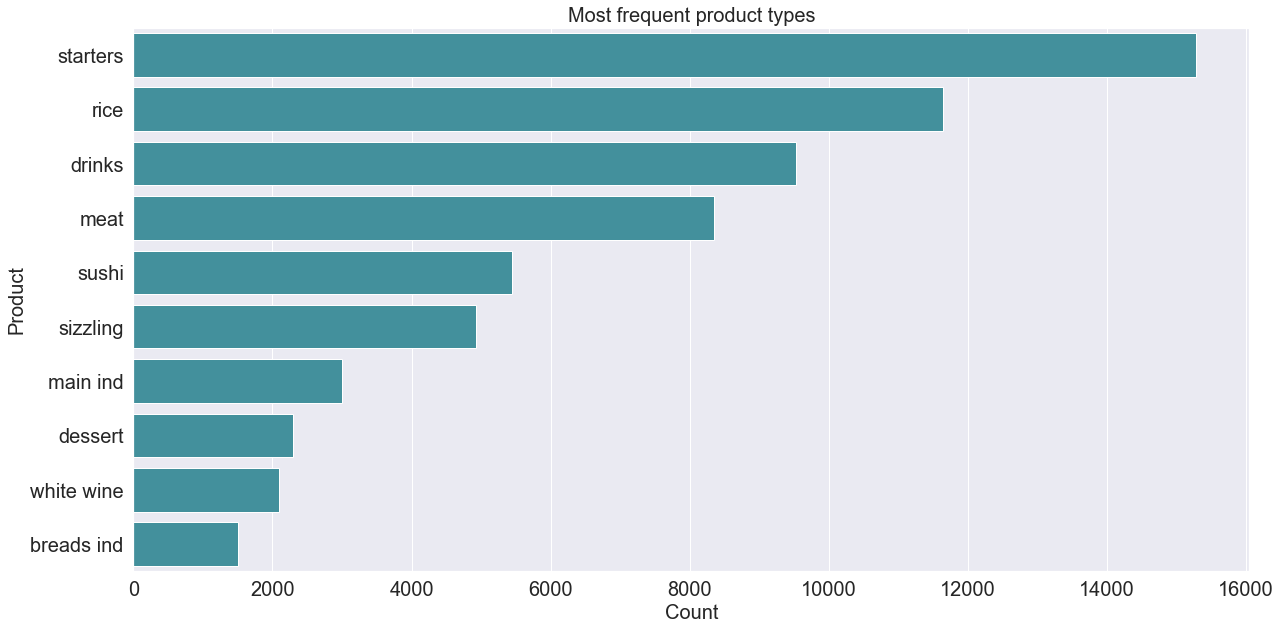

In [71]:
#most frequent values 
fig, axes = plt.subplots(figsize=(20, 10))

b = sns.countplot(y = ds_rest['ProductFamily'], order=pd.value_counts(ds_rest['ProductFamily']).iloc[:10].index,color='#349bab')

b.axes.set_title("Most frequent product types",fontsize=20)
b.set_xlabel("Count",fontsize=20)
b.set_ylabel("Product",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="fmpi">

__`6.4 Frequency of most popular items `__ 
    
</a>

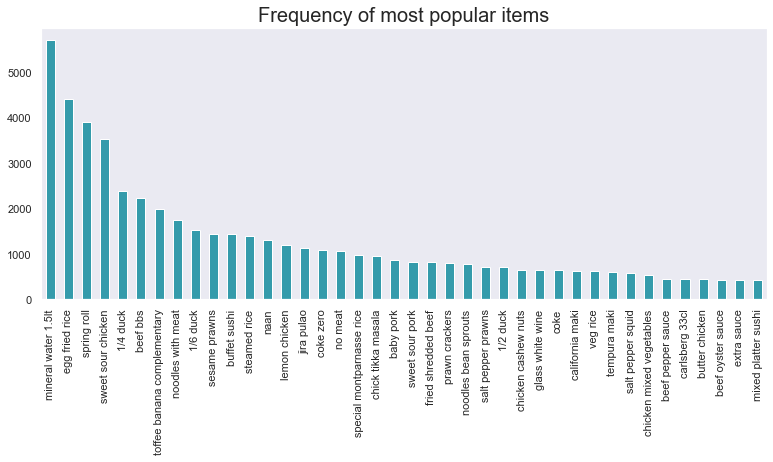

In [72]:
ds_rest['ProductDesignation'].value_counts().head(40).plot.bar(color ='#349bab', figsize=(13,5))
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

<a class="anchor" id="lfp">

__`6.5 Less frequent products`__ 
    
</a>

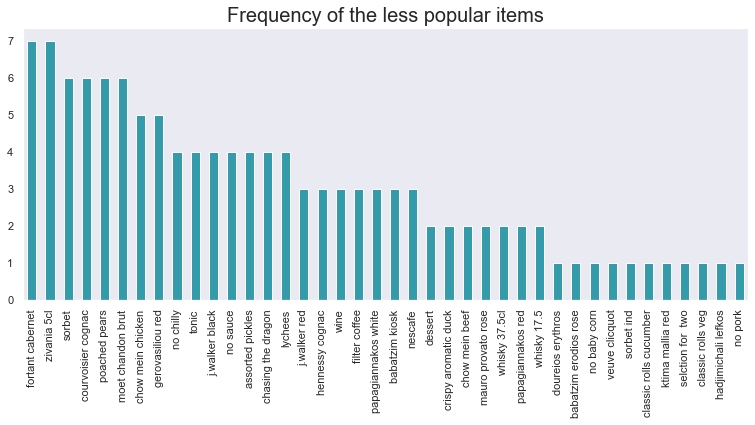

In [73]:
ds_rest['ProductDesignation'].value_counts().tail(40).plot.bar(color ='#349bab', figsize=(13,5))
plt.title('Frequency of the less popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()


In [74]:
(ds_rest['ProductDesignation'].value_counts(ascending=True)).nsmallest(10)

 no pork                  1
classic rolls veg         1
selction for  two         1
hadjimichali lefkos       1
ktima mallia red          1
 no baby corn             1
classic rolls cucumber    1
sorbet ind                1
veuve clicquot            1
babatzim erodios rose     1
Name: ProductDesignation, dtype: int64

<a class="anchor" id="nim">

__`6.6 Number of invoice per month`__ 
    
</a>

In [75]:
df = (ds_rest.groupby('Month', sort=False)
         .agg(**{'unique values': ('DocNumber', 'nunique')})
         .reset_index())
#df

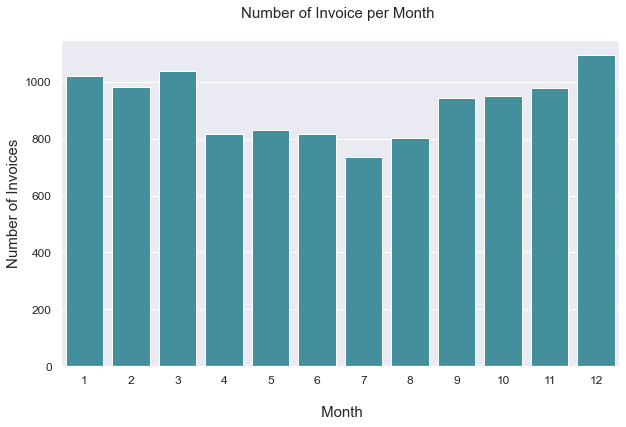

In [76]:
plt.figure(figsize=(10,6))
b = sns.barplot(data=df, x="Month", y='unique values',color='#349bab')
b.axes.set_title("Number of Invoice per Month \n",fontsize=15)
b.set_xlabel("\n Month",fontsize=15)
b.set_ylabel("Number of Invoices",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

<a class="anchor" id="nih">

__`6.7 Number of invoice per Hour`__ 
    
</a>

In [77]:
df1 = (ds_rest.groupby('Hour', sort=False)
         .agg(**{'unique values': ('DocNumber', 'nunique')})
         .reset_index())
#df

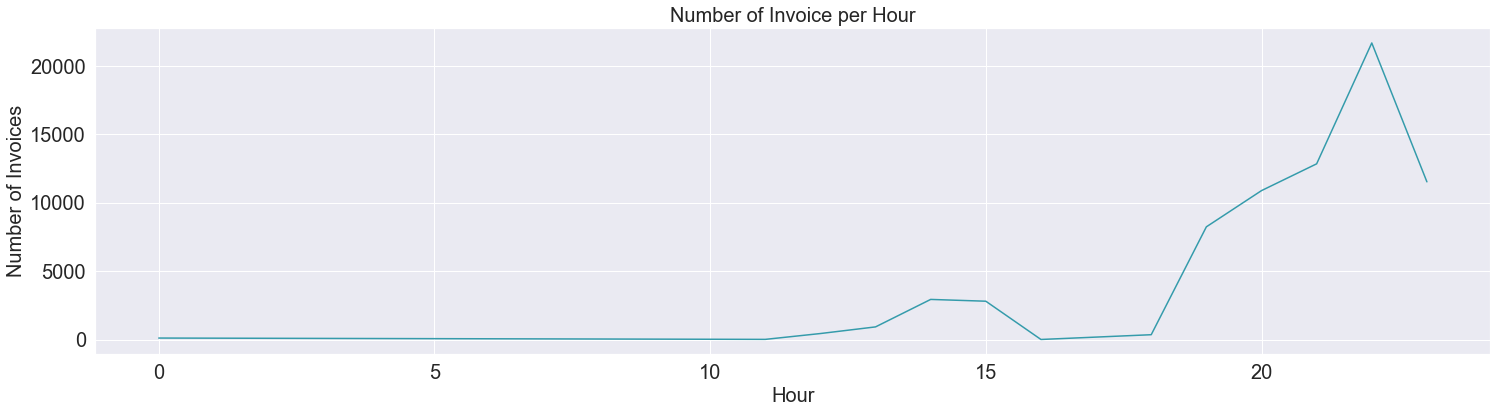

In [78]:
plt.figure(figsize=(25,6))
b = ds_rest.groupby(ds_rest['Hour'], sort=True)['DocNumber'].size().plot(color='#349bab')
b.axes.set_title("Number of Invoice per Hour",fontsize=20)
#b.set(xlim = (12,24))
b.set_xlabel("Hour",fontsize=20)
b.set_ylabel("Number of Invoices",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

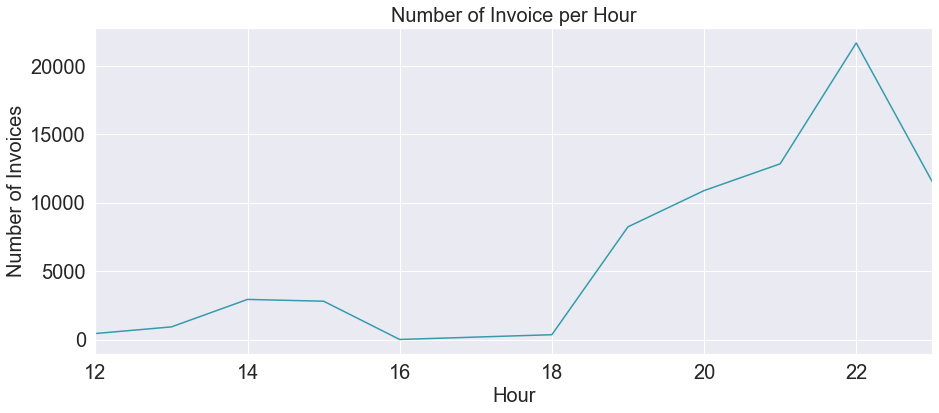

In [79]:
plt.figure(figsize=(15,6))
b = ds_rest.groupby(ds_rest['Hour'], sort=True)['DocNumber'].size().plot(color='#349bab')
b.axes.set_title("Number of Invoice per Hour",fontsize=20)
b.set(xlim = (12,23))
b.set_xlabel("Hour",fontsize=20)
b.set_ylabel("Number of Invoices",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="niw">

__`6.8 Number of invoice per Weekday`__ 
    
</a>

In [80]:
df2 = (ds_rest.groupby('WeekDay', sort=False)
         .agg(**{'unique values': ('DocNumber', 'nunique')})
         .reset_index())
#df2

In [81]:
#ds = ds_rest.loc[(ds_rest['WeekDay'] == 'Sunday'), 'DocNumber'].unique()

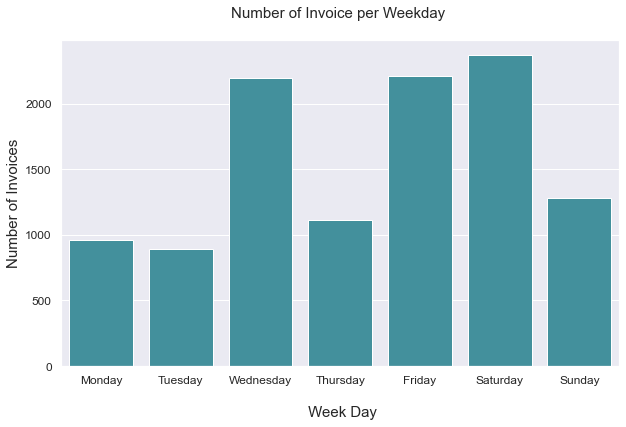

In [82]:
plt.figure(figsize=(10,6))
b = sns.barplot(data=df2, x="WeekDay", y='unique values',color='#349bab')
b.axes.set_title("Number of Invoice per Weekday \n",fontsize=15)
b.set_xlabel("\n Week Day",fontsize=15)
b.set_ylabel("Number of Invoices",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

<a class="anchor" id="totalvs">

__`6.9 Total amount per season delivery vs no delivery`__ 
    
</a>

C:\Users\catar\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\catar\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


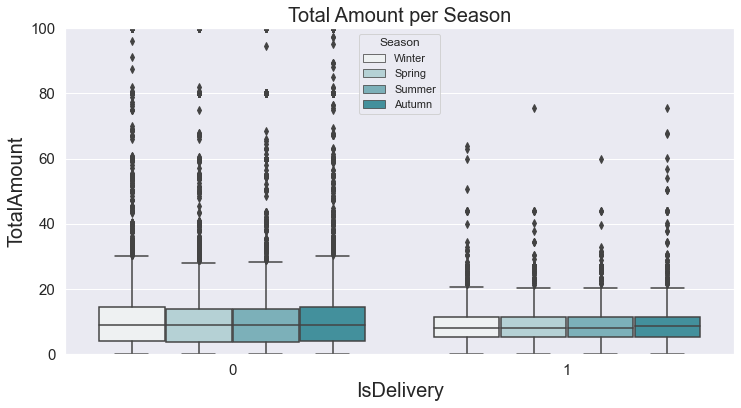

In [83]:
# boxplot
ax = sns.boxplot(x='IsDelivery', y='TotalAmount', data=ds_rest, hue='Season',color='#349bab')
ax.figure.set_size_inches(12,6)
ax.set(ylim = (0,100)) #meti este filtro se não não se via nada por causa dos outliers
ax.axes.set_title("Total Amount per Season",fontsize=20)
ax.set_xlabel("IsDelivery",fontsize=20)
ax.set_ylabel("TotalAmount",fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

<a class="anchor" id="pie">

__`6.10 Pie Chart of Delivery`__ 
    
</a>

In [84]:
data = dict(type='pie', labels=ds_rest['IsDelivery'].value_counts().index, values=ds_rest['IsDelivery'].value_counts())

fig = go.Figure(data=[data])

colors = ['#349bab', '#b5d1d5']
fig.update_traces(marker_colors=colors, selector=dict(type='pie'))

fig.show()

C:\Users\catar\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\catar\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<a class="anchor" id="nip">

__`6.11 Number of invoice per season`__ 
    
</a>

In [85]:
df3 = (ds_rest.groupby(['Season'], sort=False)
         .agg(**{'unique values': ('DocNumber', 'nunique')})
         .reset_index())
#df3

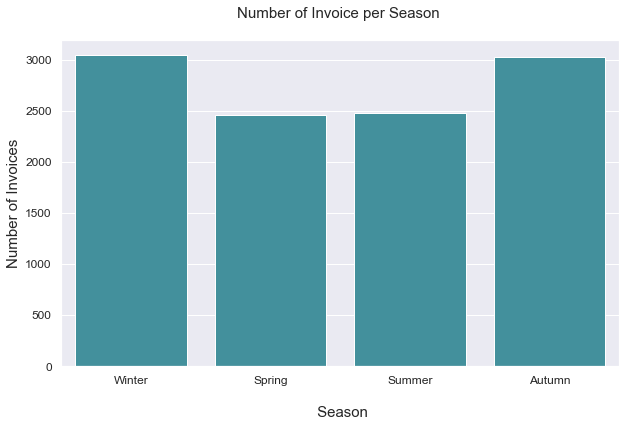

In [86]:
plt.figure(figsize=(10,6))
b = sns.barplot(data=df3, x="Season", y='unique values',color='#349bab')
b.axes.set_title("Number of Invoice per Season \n",fontsize=15)
b.set_xlabel("\n Season",fontsize=15)
b.set_ylabel("Number of Invoices",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

<a class="anchor" id="ncs">

__`6.12 Number of customers per season`__ 
    
</a>

In [87]:
df4 = (ds_rest.groupby(['Season','Pax'], sort=False)
         .agg(**{'unique values': ('DocNumber', 'nunique')})
         .reset_index())
#df3

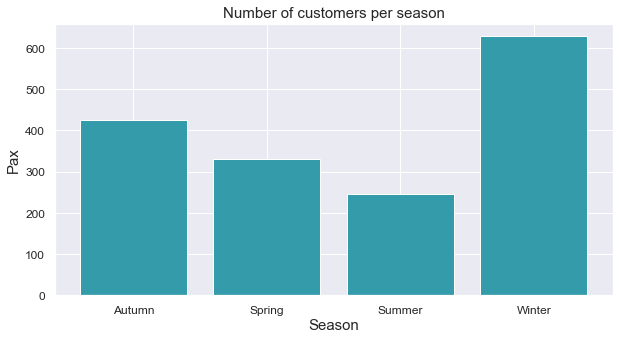

In [88]:
grouped_df = df4.groupby('Season')['Pax'].sum()

# create bar plot
plt.figure(figsize=(10,5))

plt.bar(grouped_df.index, grouped_df.values,color='#349bab')
plt.title('Number of customers per season',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Pax',fontsize=15)

plt.tick_params(axis='both',labelsize=12)

plt.show()

<a class="anchor" id="mfps">

__`6.13 Most frequent products per season`__ 
    
</a>

C:\Users\catar\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\catar\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



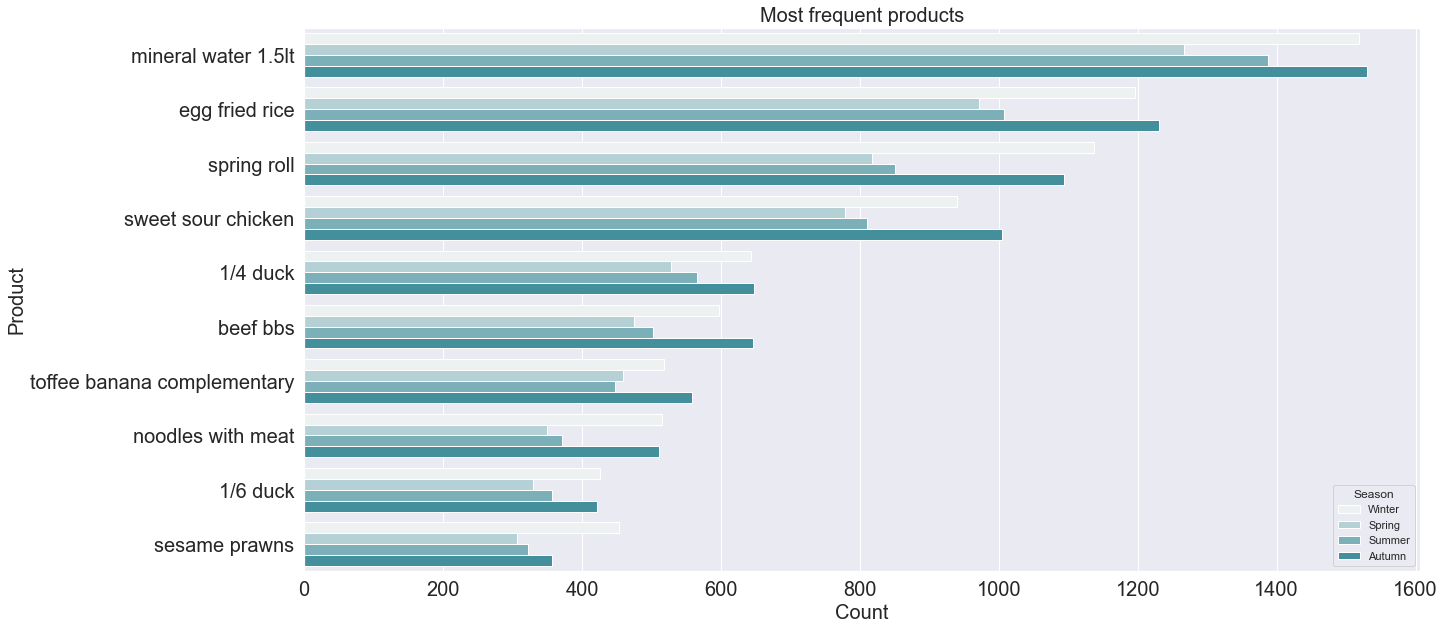

In [89]:
#most frequent values 
fig, axes = plt.subplots(figsize=(20, 10))

b = sns.countplot(y = ds_rest['ProductDesignation'], order=pd.value_counts(ds_rest['ProductDesignation']).iloc[:10].index, hue = ds_rest['Season'], color='#349bab')

b.axes.set_title("Most frequent products",fontsize=20)
b.set_xlabel("Count",fontsize=20)
b.set_ylabel("Product",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="new">

__`6.14 Number of employees per WeekDay`__ 
    
</a>

In [90]:
df4 = (ds_rest.groupby('WeekDay', sort=False)
         .agg(**{'unique values': ('EmployeeID', 'nunique')})
         .reset_index())
#df4

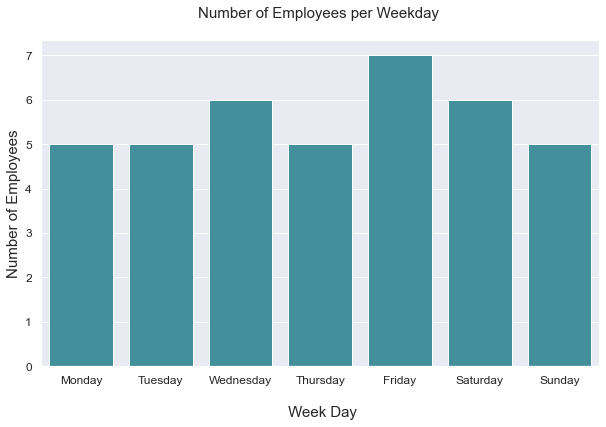

In [91]:
plt.figure(figsize=(10,6))
b = sns.barplot(data=df4, x="WeekDay", y='unique values',color='#349bab')
b.axes.set_title("Number of Employees per Weekday \n",fontsize=15)
b.set_xlabel("\n Week Day",fontsize=15)
b.set_ylabel("Number of Employees",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

<a class="anchor" id="mfpdev">

__`6.15 Most frequent products of delivery orders`__ 
    
</a>

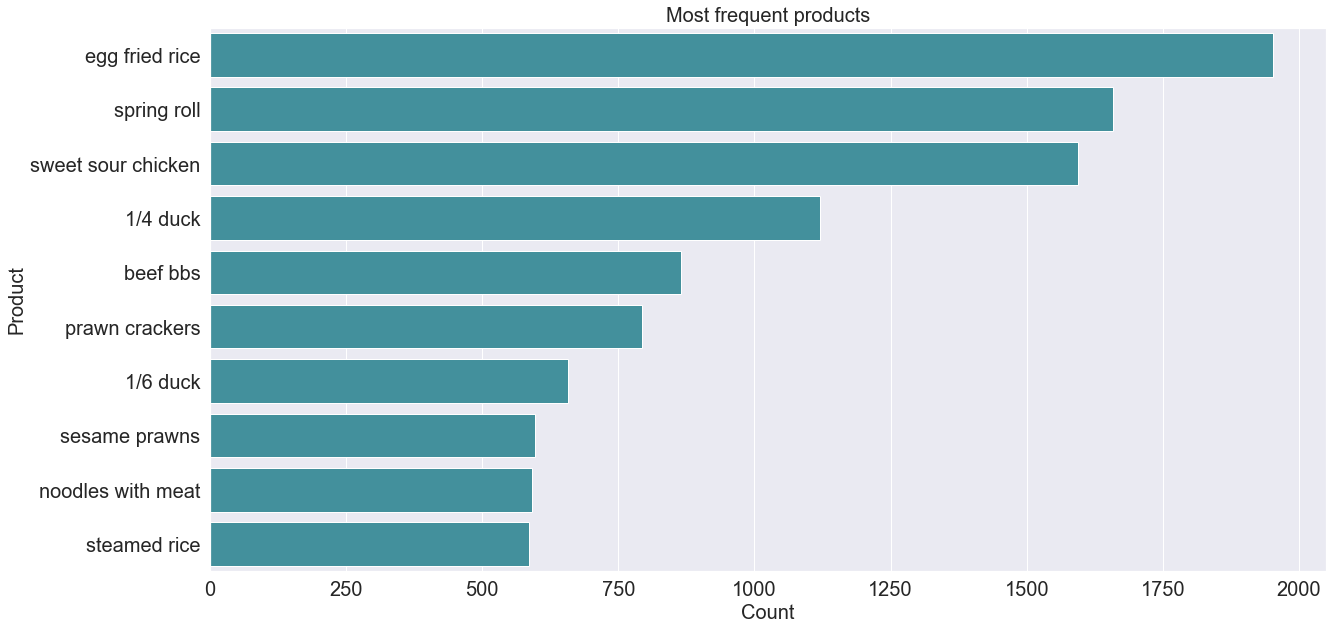

In [92]:
#most frequent values 
fig, axes = plt.subplots(figsize=(20, 10))

b = sns.countplot(y = ds_rest_delivery['ProductDesignation'], order=pd.value_counts(ds_rest_delivery['ProductDesignation']).iloc[:10].index,color='#349bab')

b.axes.set_title("Most frequent products",fontsize=20)
b.set_xlabel("Count",fontsize=20)
b.set_ylabel("Product",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="mfptdev">

__`6.16 Most frequent product type of delivery orders`__ 
    
</a>

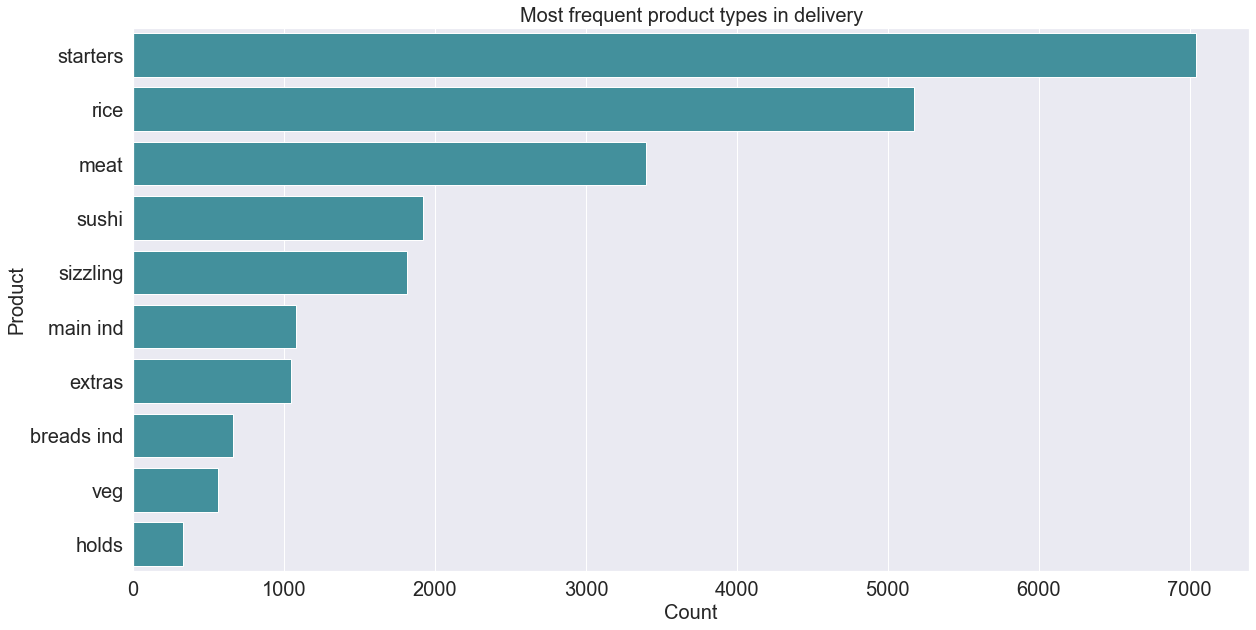

In [93]:
#most frequent values 
fig, axes = plt.subplots(figsize=(20, 10))

b = sns.countplot(y = ds_rest_delivery['ProductFamily'], order=pd.value_counts(ds_rest_delivery['ProductFamily']).iloc[:10].index,color='#349bab')

b.axes.set_title("Most frequent product types in delivery",fontsize=20)
b.set_xlabel("Count",fontsize=20)
b.set_ylabel("Product",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="mfpres">

__`6.17 Most frequent products of in restaurant orders`__ 
    
</a>

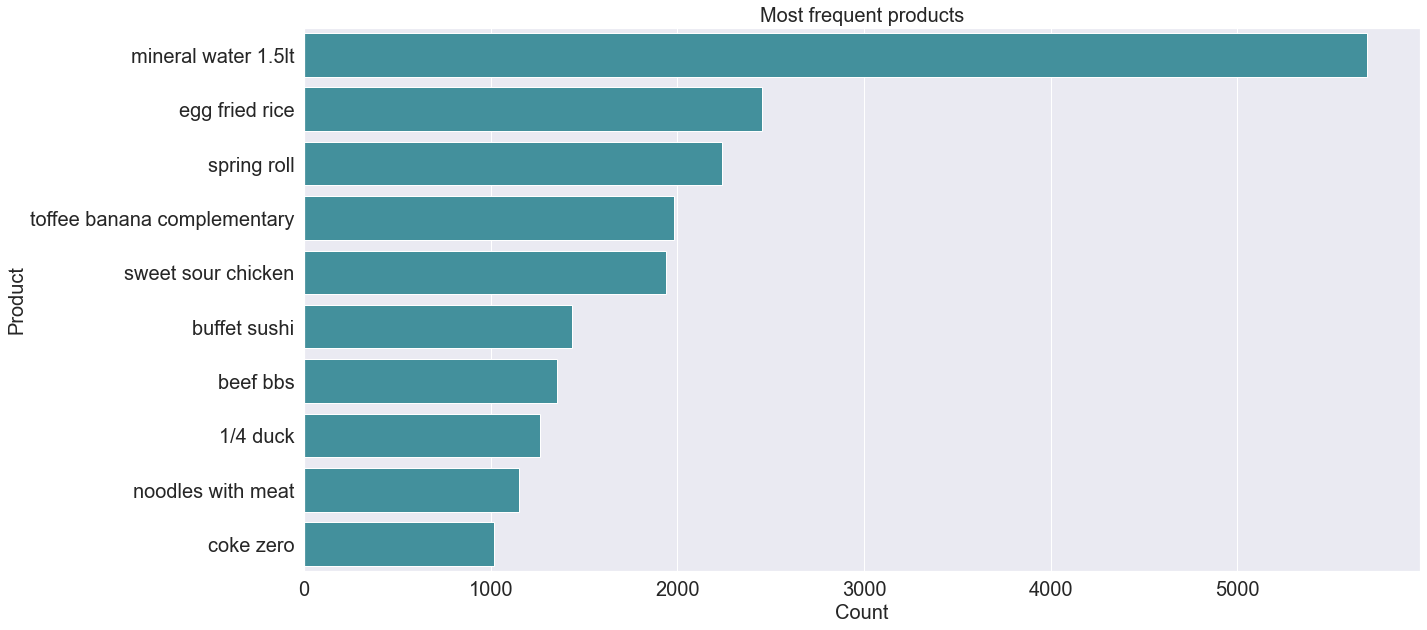

In [94]:
#most frequent values 
fig, axes = plt.subplots(figsize=(20, 10))

b = sns.countplot(y = ds_rest_nodelivery['ProductDesignation'], order=pd.value_counts(ds_rest_nodelivery['ProductDesignation']).iloc[:10].index,color='#349bab')

b.axes.set_title("Most frequent products",fontsize=20)
b.set_xlabel("Count",fontsize=20)
b.set_ylabel("Product",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="mfptres">

__`6.18 Most frequent product type of in restaurant orders`__ 
    
</a>

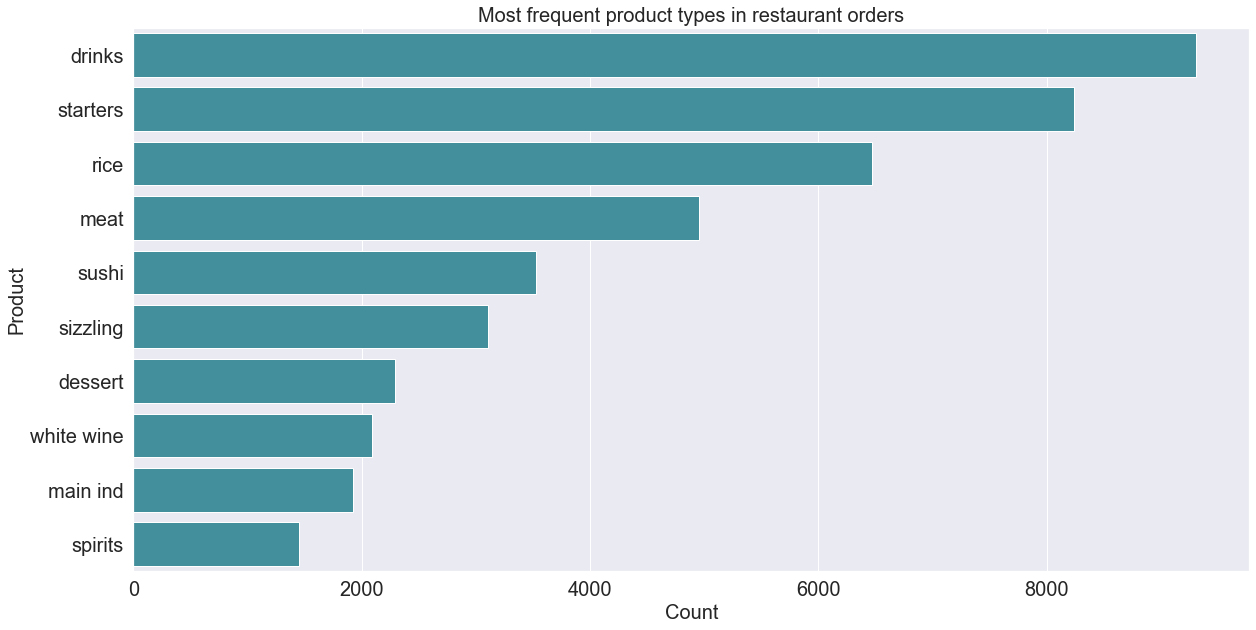

In [95]:
#most frequent values 
fig, axes = plt.subplots(figsize=(20, 10))

b = sns.countplot(y = ds_rest_nodelivery['ProductFamily'], order=pd.value_counts(ds_rest_nodelivery['ProductFamily']).iloc[:10].index,color='#349bab')

b.axes.set_title("Most frequent product types in restaurant orders",fontsize=20)
b.set_xlabel("Count",fontsize=20)
b.set_ylabel("Product",fontsize=20)
b.tick_params(labelsize=20)
plt.show()

<a class="anchor" id="mkbadev">

# `Market Basket Analysis - Delivery`
    
</a>

In [96]:
ds_rest_basket = ds_rest_delivery.groupby(['DocNumber', 'ProductDesignation'])["Qty"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("DocNumber")

ds_rest_basket

ProductDesignation   extra pancakes   extra salad   extra sauce  \
DocNumber                                                         
TKD0310000012018                0.0           0.0           0.0   
TKD0310000022018                0.0           0.0           0.0   
TKD0310000032018                0.0           0.0           0.0   
TKD0310000042018                0.0           0.0           0.0   
TKD0310000052018                0.0           0.0           0.0   
...                             ...           ...           ...   
TKD0320044492018                0.0           0.0           0.0   
TKD0320044502018                0.0           0.0           0.0   
TKD0320044512018                0.0           0.0           0.0   
TKD0320044522018                0.0           0.0           0.0   
TKD0320044532018                0.0           0.0           0.0   

ProductDesignation   no beansprouts   no chilly   no egg   no meat  \
DocNumber                                                            
TKD0310000012018                0.0         0.0      0.0       0.0   
TKD0310000022018                0.0         0.0      0.0       0.0   
TKD0310000032018                0.0         0.0      0.0       0.0   
TKD0310000042018                0.0         0.0      0.0       0.0   
TKD0310000052018                0.0         0.0      0.0       0.0   
...                             ...         ...      ...       ...   
TKD0320044492018                0.0         0.0      0.0       0.0   
TKD0320044502018                0.0         0.0      0.0       0.0   
TKD0320044512018                0.0         0.0      0.0       0.0   
TKD0320044522018                0.0         0.0      0.0       0.0   
TKD0320044532018                0.0         0.0      0.0       0.0   

ProductDesignation   no mushrooms   no onion   no pork  ...  \
DocNumber                                               ...   
TKD0310000012018              0.0        0.0       0.0  ...   
TKD0310000022018              0.0        0.0       0.0  ...   
TKD0310000032018              0.0        0.0       0.0  ...   
TKD0310000042018              0.0        0.0       0.0  ...   
TKD0310000052018              0.0        0.0       0.0  ...   
...                           ...        ...       ...  ...   
TKD0320044492018              0.0        0.0       0.0  ...   
TKD0320044502018              0.0        0.0       0.0  ...   
TKD0320044512018              0.0        0.0       0.0  ...   
TKD0320044522018              0.0        0.0       0.0  ...   
TKD0320044532018              0.0        0.0       0.0  ...   

ProductDesignation  tandoori till jheenga  tandoori trilogy  tempura maki  \
DocNumber                                                                   
TKD0310000012018                      0.0               1.0           0.0   
TKD0310000022018                      0.0               0.0           0.0   
TKD0310000032018                      0.0               0.0           0.0   
TKD0310000042018                      0.0               0.0           0.0   
TKD0310000052018                      0.0               1.0           0.0   
...                                   ...               ...           ...   
TKD0320044492018                      0.0               0.0           0.0   
TKD0320044502018                      0.0               0.0           0.0   
TKD0320044512018                      0.0               0.0           0.0   
TKD0320044522018                      0.0               0.0           0.0   
TKD0320044532018                      0.0               0.0           0.0   

ProductDesignation  tin jian style chicken  veg bbs  veg rice  volcano maki  \
DocNumber                                                                     
TKD0310000012018                       0.0      0.0       0.0           0.0   
TKD0310000022018                       0.0      0.0       0.0           0.0   
TKD0310000032018                       0.0      0.0       0.0           0.0   


In [97]:
#Create function to hot encode the values
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Apply function to data
basket_encoded = ds_rest_basket.applymap(encode_values)

ds_rest_basket = basket_encoded.copy() 
ds_rest_basket

ProductDesignation   extra pancakes   extra salad   extra sauce  \
DocNumber                                                         
TKD0310000012018                  0             0             0   
TKD0310000022018                  0             0             0   
TKD0310000032018                  0             0             0   
TKD0310000042018                  0             0             0   
TKD0310000052018                  0             0             0   
...                             ...           ...           ...   
TKD0320044492018                  0             0             0   
TKD0320044502018                  0             0             0   
TKD0320044512018                  0             0             0   
TKD0320044522018                  0             0             0   
TKD0320044532018                  0             0             0   

ProductDesignation   no beansprouts   no chilly   no egg   no meat  \
DocNumber                                                            
TKD0310000012018                  0           0        0         0   
TKD0310000022018                  0           0        0         0   
TKD0310000032018                  0           0        0         0   
TKD0310000042018                  0           0        0         0   
TKD0310000052018                  0           0        0         0   
...                             ...         ...      ...       ...   
TKD0320044492018                  0           0        0         0   
TKD0320044502018                  0           0        0         0   
TKD0320044512018                  0           0        0         0   
TKD0320044522018                  0           0        0         0   
TKD0320044532018                  0           0        0         0   

ProductDesignation   no mushrooms   no onion   no pork  ...  \
DocNumber                                               ...   
TKD0310000012018                0          0         0  ...   
TKD0310000022018                0          0         0  ...   
TKD0310000032018                0          0         0  ...   
TKD0310000042018                0          0         0  ...   
TKD0310000052018                0          0         0  ...   
...                           ...        ...       ...  ...   
TKD0320044492018                0          0         0  ...   
TKD0320044502018                0          0         0  ...   
TKD0320044512018                0          0         0  ...   
TKD0320044522018                0          0         0  ...   
TKD0320044532018                0          0         0  ...   

ProductDesignation  tandoori till jheenga  tandoori trilogy  tempura maki  \
DocNumber                                                                   
TKD0310000012018                        0                 1             0   
TKD0310000022018                        0                 0             0   
TKD0310000032018                        0                 0             0   
TKD0310000042018                        0                 0             0   
TKD0310000052018                        0                 1             0   
...                                   ...               ...           ...   
TKD0320044492018                        0                 0             0   
TKD0320044502018                        0                 0             0   
TKD0320044512018                        0                 0             0   
TKD0320044522018                        0                 0             0   
TKD0320044532018                        0                 0             0   

ProductDesignation  tin jian style chicken  veg bbs  veg rice  volcano maki  \
DocNumber                                                                     
TKD0310000012018                         0        0         0             0   
TKD0310000022018                         0        0         0             0   
TKD0310000032018                         0        0         0             0   


In [98]:
basket_filtered = ds_rest_basket[(ds_rest_basket > 0).sum(axis=1) >= 2]

ds_rest_basket = basket_filtered.copy()

In [99]:
4771/4865 

0.9806783144912641

> **98%** of the transactions include more than **1** item.

<a class="anchor" id="freqitemdev">

__`7.1 Frequent Itemsets`__ 
    
</a>

In [103]:
#Generate the frequent itemsets with Apriori Algorithm
frequent_itemsets = apriori(ds_rest_basket, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

C:\Users\catar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                              itemsets
19   0.419626                      (egg fried rice)
33   0.355929                         (spring roll)
35   0.342802                  (sweet sour chicken)
5    0.239940                            (1/4 duck)
85   0.221218  (egg fried rice, sweet sour chicken)
8    0.186142                            (beef bbs)
84   0.177319         (spring roll, egg fried rice)
27   0.169572                      (prawn crackers)
105  0.149344     (spring roll, sweet sour chicken)
6    0.141166                            (1/6 duck)

<a class="anchor" id="asdev">

__`7.2 Association Rules`__ 
    
</a>

In [104]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(10)

antecedents                      consequents  \
29       ( extra salad,  extra sauce)                ( extra pancakes)   
14                         ( no meat)              (noodles with meat)   
25                     ( extra salad)                ( extra pancakes)   
37            (spring roll,  no meat)              (noodles with meat)   
28    ( extra salad,  extra pancakes)                   ( extra sauce)   
27                     ( extra salad)                   ( extra sauce)   
31                     ( extra salad)  ( extra pancakes,  extra sauce)   
49        (1/4 duck,  extra pancakes)                   ( extra sauce)   
51  (egg fried rice,  extra pancakes)                   ( extra sauce)   
12                  ( extra pancakes)                   ( extra sauce)   

    antecedent support  consequent support   support  confidence       lift  \
29            0.044760            0.087153  0.044760    1.000000  11.474074   
14            0.063697            0.126748  0.063697    1.000000   7.889643   
25            0.045836            0.087153  0.045836    1.000000  11.474074   
37            0.034216            0.126748  0.034216    1.000000   7.889643   
28            0.045836            0.091887  0.044760    0.976526  10.627437   
27            0.045836            0.091887  0.044760    0.976526  10.627437   
31            0.045836            0.064988  0.044760    0.976526  15.026210   
49            0.040671            0.091887  0.032064    0.788360   8.579644   
51            0.040456            0.091887  0.031418    0.776596   8.451617   
12            0.087153            0.091887  0.064988    0.745679   8.115153   

    leverage  conviction  
29  0.040859         inf  
14  0.055624         inf  
25  0.041841         inf  
37  0.029879         inf  
28  0.040548   38.685604  
27  0.040548   38.685604  
31  0.041781   39.831504  
49  0.028327    4.290833  
51  0.027701    4.064886  
12  0.056980    3.570735

In [105]:
rulesConfidence.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

antecedents           consequents  \
1               (sweet sour chicken)      (egg fried rice)   
0                   (egg fried rice)  (sweet sour chicken)   
2                         (1/4 duck)      (egg fried rice)   
3                         (beef bbs)      (egg fried rice)   
5  (spring roll, sweet sour chicken)      (egg fried rice)   
4      (spring roll, egg fried rice)  (sweet sour chicken)   
6                   (prawn crackers)      (egg fried rice)   
8     (1/4 duck, sweet sour chicken)      (egg fried rice)   
7         (1/4 duck, egg fried rice)  (sweet sour chicken)   
9                    (sesame prawns)      (egg fried rice)   

   antecedent support  consequent support   support  confidence      lift  \
1            0.342802            0.419626  0.221218    0.645323  1.537855   
0            0.419626            0.342802  0.221218    0.527179  1.537855   
2            0.239940            0.419626  0.129761    0.540807  1.288785   
3            0.186142            0.419626  0.112546    0.604624  1.440866   
5            0.149344            0.419626  0.093609    0.626801  1.493715   
4            0.177319            0.342802  0.093609    0.527913  1.539994   
6            0.169572            0.419626  0.090166    0.531726  1.267144   
8            0.107166            0.419626  0.072305    0.674699  1.607859   
7            0.129761            0.342802  0.072305    0.557214  1.625470   
9            0.128470            0.419626  0.066064    0.514238  1.225468   

   leverage  conviction  
1  0.077370    1.636348  
0  0.077370    1.389953  
2  0.029076    1.263901  
3  0.034436    1.467906  
5  0.030940    1.555135  
4  0.032824    1.392111  
6  0.019009    1.239390  
8  0.027335    1.784114  
7  0.027822    1.484234  
9  0.012155    1.194771

In [106]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.9) & (rulesConfidence['lift'] >= 4)]

antecedents                      consequents  \
29     ( extra salad,  extra sauce)                ( extra pancakes)   
14                       ( no meat)              (noodles with meat)   
25                   ( extra salad)                ( extra pancakes)   
37          (spring roll,  no meat)              (noodles with meat)   
28  ( extra salad,  extra pancakes)                   ( extra sauce)   
27                   ( extra salad)                   ( extra sauce)   
31                   ( extra salad)  ( extra pancakes,  extra sauce)   

    antecedent support  consequent support   support  confidence       lift  \
29            0.044760            0.087153  0.044760    1.000000  11.474074   
14            0.063697            0.126748  0.063697    1.000000   7.889643   
25            0.045836            0.087153  0.045836    1.000000  11.474074   
37            0.034216            0.126748  0.034216    1.000000   7.889643   
28            0.045836            0.091887  0.044760    0.976526  10.627437   
27            0.045836            0.091887  0.044760    0.976526  10.627437   
31            0.045836            0.064988  0.044760    0.976526  15.026210   

    leverage  conviction  
29  0.040859         inf  
14  0.055624         inf  
25  0.041841         inf  
37  0.029879         inf  
28  0.040548   38.685604  
27  0.040548   38.685604  
31  0.041781   39.831504

In [107]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

antecedents                      consequents  \
122  ( extra pancakes,  extra sauce)                   ( extra salad)   
123                   ( extra salad)  ( extra pancakes,  extra sauce)   
113                ( extra pancakes)                   ( extra salad)   
124                ( extra pancakes)     ( extra salad,  extra sauce)   
112                   ( extra salad)                ( extra pancakes)   
121     ( extra salad,  extra sauce)                ( extra pancakes)   
125                   ( extra sauce)  ( extra salad,  extra pancakes)   
118                   ( extra salad)                   ( extra sauce)   
120  ( extra salad,  extra pancakes)                   ( extra sauce)   
119                   ( extra sauce)                   ( extra salad)   

     antecedent support  consequent support   support  confidence       lift  \
122            0.064988            0.045836  0.044760    0.688742  15.026210   
123            0.045836            0.064988  0.044760    0.976526  15.026210   
113            0.087153            0.045836  0.045836    0.525926  11.474074   
124            0.087153            0.044760  0.044760    0.513580  11.474074   
112            0.045836            0.087153  0.045836    1.000000  11.474074   
121            0.044760            0.087153  0.044760    1.000000  11.474074   
125            0.091887            0.045836  0.044760    0.487119  10.627437   
118            0.045836            0.091887  0.044760    0.976526  10.627437   
120            0.045836            0.091887  0.044760    0.976526  10.627437   
119            0.091887            0.045836  0.044760    0.487119  10.627437   

     leverage  conviction  
122  0.041781    3.065506  
123  0.041781   39.831504  
113  0.041841    2.012690  
124  0.040859    1.963818  
112  0.041841         inf  
121  0.040859         inf  
125  0.040548    1.860402  
118  0.040548   38.685604  
120  0.040548   38.685604  
119  0.040548    1.860402

In [108]:
rulesLift.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

antecedents           consequents  antecedent support  \
1  (sweet sour chicken)      (egg fried rice)            0.342802   
0      (egg fried rice)  (sweet sour chicken)            0.419626   
2         (spring roll)      (egg fried rice)            0.355929   
3      (egg fried rice)         (spring roll)            0.419626   
5  (sweet sour chicken)         (spring roll)            0.342802   
4         (spring roll)  (sweet sour chicken)            0.355929   
6            (1/4 duck)      (egg fried rice)            0.239940   
7      (egg fried rice)            (1/4 duck)            0.419626   
9            (beef bbs)      (egg fried rice)            0.186142   
8      (egg fried rice)            (beef bbs)            0.419626   

   consequent support   support  confidence      lift  leverage  conviction  
1            0.419626  0.221218    0.645323  1.537855  0.077370    1.636348  
0            0.342802  0.221218    0.527179  1.537855  0.077370    1.389953  
2            0.419626  0.177319    0.498186  1.187216  0.027962    1.156553  
3            0.355929  0.177319    0.422564  1.187216  0.027962    1.115399  
5            0.355929  0.149344    0.435656  1.223998  0.027331    1.141275  
4            0.342802  0.149344    0.419589  1.223998  0.027331    1.132298  
6            0.419626  0.129761    0.540807  1.288785  0.029076    1.263901  
7            0.239940  0.129761    0.309231  1.288785  0.029076    1.100310  
9            0.419626  0.112546    0.604624  1.440866  0.034436    1.467906  
8            0.186142  0.112546    0.268205  1.440866  0.034436    1.112140

In [109]:
# High Confidence and high Lift
rulesLift[(rulesLift['confidence'] >= 0.9) & (rulesLift['lift'] >= 4)]

antecedents                      consequents  \
123                   ( extra salad)  ( extra pancakes,  extra sauce)   
112                   ( extra salad)                ( extra pancakes)   
121     ( extra salad,  extra sauce)                ( extra pancakes)   
118                   ( extra salad)                   ( extra sauce)   
120  ( extra salad,  extra pancakes)                   ( extra sauce)   
164          (spring roll,  no meat)              (noodles with meat)   
46                        ( no meat)              (noodles with meat)   

     antecedent support  consequent support   support  confidence       lift  \
123            0.045836            0.064988  0.044760    0.976526  15.026210   
112            0.045836            0.087153  0.045836    1.000000  11.474074   
121            0.044760            0.087153  0.044760    1.000000  11.474074   
118            0.045836            0.091887  0.044760    0.976526  10.627437   
120            0.045836            0.091887  0.044760    0.976526  10.627437   
164            0.034216            0.126748  0.034216    1.000000   7.889643   
46             0.063697            0.126748  0.063697    1.000000   7.889643   

     leverage  conviction  
123  0.041781   39.831504  
112  0.041841         inf  
121  0.040859         inf  
118  0.040548   38.685604  
120  0.040548   38.685604  
164  0.029879         inf  
46   0.055624         inf

<a class="anchor" id="expdev">

__`7.3 Explore Frequent Itemsets`__ 
    
</a>

In [110]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [149]:
# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.2)]

support                                           itemsets  length
148  0.374696              (egg fried rice, mineral water 1.5lt)       2
189  0.341973                 (spring roll, mineral water 1.5lt)       2
198  0.298882  (mineral water 1.5lt, toffee banana complement...       2
192  0.293860          (sweet sour chicken, mineral water 1.5lt)       2
154  0.226146                      (spring roll, egg fried rice)       2
156  0.222420               (egg fried rice, sweet sour chicken)       2
113  0.216912                (buffet sushi, mineral water 1.5lt)       2
101  0.207679                    (beef bbs, mineral water 1.5lt)       2

In [114]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'spring roll', 'egg fried rice'}]

support                       itemsets  length
84  0.177319  (spring roll, egg fried rice)       2

In [115]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'egg fried rice'}]

support          itemsets  length
19  0.419626  (egg fried rice)       1

In [116]:
# High Confidence rules where "egg fried rice" and "1/4 duck" are in the LHS
rulesConfidence[rulesConfidence['antecedents']=={'egg fried rice','1/4 duck'}]

antecedents           consequents  antecedent support  \
7  (1/4 duck, egg fried rice)  (sweet sour chicken)            0.129761   

   consequent support   support  confidence     lift  leverage  conviction  
7            0.342802  0.072305    0.557214  1.62547  0.027822    1.484234

In [150]:
# High Confidence rules where sweet sour chicken is in the RHS
rulesConfidence[['sweet sour chicken' in elem for elem in rulesConfidence['consequents']]]

antecedents  \
941   (spring roll, sesame prawns, egg fried rice, m...   
887        (spring roll, sesame prawns, egg fried rice)   
473    (spring roll, egg fried rice, noodles with meat)   
522   (spring roll, egg fried rice, mineral water 1....   
902   (spring roll, egg fried rice,  no meat, noodle...   
...                                                 ...   
255                          (1/4 duck, egg fried rice)   
680                     (egg fried rice, lemon chicken)   
25                   (spring roll, mineral water 1.5lt)   
21                                        (spring roll)   
1049   (baby pork, egg fried rice, mineral water 1.5lt)   

                                    consequents  antecedent support  \
941                        (sweet sour chicken)            0.054107   
887                        (sweet sour chicken)            0.056861   
473                        (sweet sour chicken)            0.075976   
522                        (sweet sour chicken)            0.074194   
902                        (sweet sour chicken)            0.056537   
...                                         ...                 ...   
255   (sweet sour chicken, mineral water 1.5lt)            0.127005   
680   (sweet sour chicken, mineral water 1.5lt)            0.079702   
25                         (sweet sour chicken)            0.341973   
21                         (sweet sour chicken)            0.363033   
1049                       (sweet sour chicken)            0.064150   

      consequent support   support  confidence      lift  leverage  conviction  
941              0.31411  0.034667    0.640719  2.039791  0.017672    1.909061  
887              0.31411  0.035963    0.632479  2.013559  0.018103    1.866259  
473              0.31411  0.047789    0.628998  2.002477  0.023924    1.848750  
522              0.31411  0.046493    0.626638  1.994963  0.023188    1.837063  
902              0.31411  0.035315    0.624642  1.988610  0.017556    1.827295  
...                  ...       ...         ...       ...       ...         ...  
255              0.29386  0.064474    0.507653  1.727532  0.027153    1.434232  
680              0.29386  0.040337    0.506098  1.722238  0.016916    1.429715  
25               0.31411  0.172850    0.505448  1.609143  0.065432    1.386891  
21               0.31411  0.182245    0.502008  1.598193  0.068213    1.377312  
1049             0.31411  0.032075    0.500000  1.591800  0.011925    1.371780  

[155 rows x 9 columns]

<a class="anchor" id="subproddev">

__`7.4 Substitute Products`__ 
    
</a>

In [118]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(10)

antecedents  \
163                (noodles bean sprouts)   
162                  (sweet sour chicken)   
265                            (1/6 duck)   
260  (egg fried rice, sweet sour chicken)   
106                  (sweet sour chicken)   
107                            (1/6 duck)   
201                        ( extra sauce)   
200                         (spring roll)   
148                       (lemon chicken)   
149                  (sweet sour chicken)   

                              consequents  antecedent support  \
163                  (sweet sour chicken)            0.103938   
162                (noodles bean sprouts)            0.342802   
265  (egg fried rice, sweet sour chicken)            0.141166   
260                            (1/6 duck)            0.221218   
106                            (1/6 duck)            0.342802   
107                  (sweet sour chicken)            0.141166   
201                         (spring roll)            0.091887   
200                        ( extra sauce)            0.355929   
148                  (sweet sour chicken)            0.107596   
149                       (lemon chicken)            0.342802   

     consequent support   support  confidence      lift  leverage  conviction  
163            0.342802  0.034861    0.335404  0.978419 -0.000769    0.988868  
162            0.103938  0.034861    0.101695  0.978419 -0.000769    0.997503  
265            0.221218  0.030773    0.217988  0.985398 -0.000456    0.995869  
260            0.141166  0.030773    0.139105  0.985398 -0.000456    0.997606  
106            0.141166  0.048203    0.140615  0.996096 -0.000189    0.999359  
107            0.342802  0.048203    0.341463  0.996096 -0.000189    0.997968  
201            0.355929  0.033570    0.365340  1.026441  0.000865    1.014828  
200            0.091887  0.033570    0.094317  1.026441  0.000865    1.002683  
148            0.342802  0.037874    0.352000  1.026832  0.000990    1.014195  
149            0.107596  0.037874    0.110483  1.026832  0.000990    1.003246

<a class="anchor" id="dgdev">

__`7.5 Network Graph`__ 
    
</a>

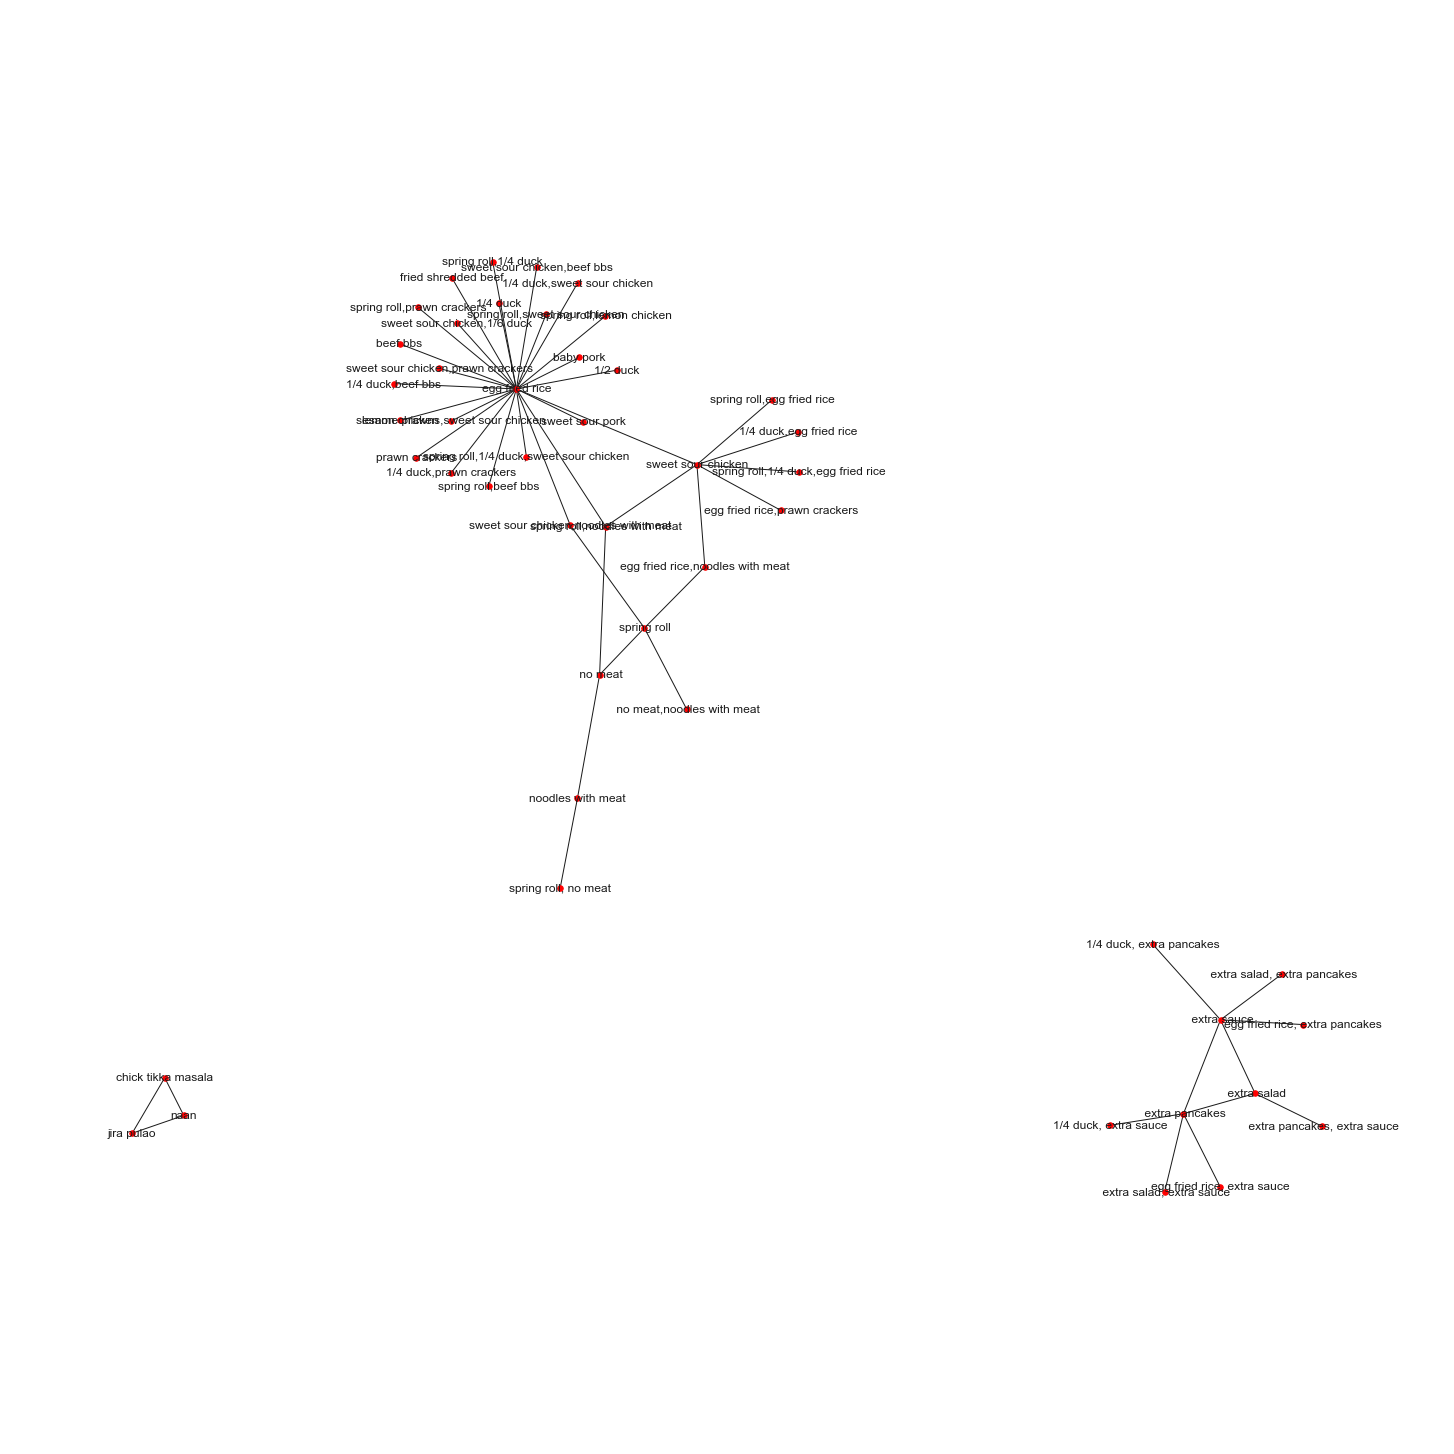

In [119]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('figure.svg')

<a class="anchor" id="mkbanodev">

# `Market Basket Analysis - No Delivery`
    
</a>

In [120]:
ds_rest_basket = ds_rest_nodelivery.groupby(['DocNumber', 'ProductDesignation'])["Qty"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("DocNumber")

ds_rest_basket

ProductDesignation   extra pancakes   extra salad   extra sauce  \
DocNumber                                                         
TK0110000012018                 0.0           0.0           0.0   
TK0110000022018                 0.0           0.0           0.0   
TK0110000032018                 0.0           0.0           0.0   
TK0110000042018                 0.0           0.0           0.0   
TK0110000052018                 0.0           0.0           0.0   
...                             ...           ...           ...   
TK0120008162018                 0.0           0.0           0.0   
TK0120008172018                 0.0           0.0           0.0   
TK0120008182018                 0.0           0.0           0.0   
TK0120008192018                 0.0           0.0           0.0   
TK0120008202018                 0.0           0.0           0.0   

ProductDesignation   no baby corn   no beansprouts   no chilly   no egg  \
DocNumber                                                                 
TK0110000012018               0.0              0.0         0.0      0.0   
TK0110000022018               0.0              0.0         0.0      0.0   
TK0110000032018               0.0              0.0         0.0      0.0   
TK0110000042018               0.0              0.0         0.0      0.0   
TK0110000052018               0.0              0.0         0.0      0.0   
...                           ...              ...         ...      ...   
TK0120008162018               0.0              0.0         0.0      0.0   
TK0120008172018               0.0              0.0         0.0      0.0   
TK0120008182018               0.0              0.0         0.0      0.0   
TK0120008192018               0.0              0.0         0.0      0.0   
TK0120008202018               0.0              0.0         0.0      0.0   

ProductDesignation   no meat   no onion   no prawns  ...  vlassides shiraz  \
DocNumber                                            ...                     
TK0110000012018          0.0        0.0         0.0  ...               0.0   
TK0110000022018          1.0        0.0         0.0  ...               0.0   
TK0110000032018          0.0        0.0         0.0  ...               0.0   
TK0110000042018          0.0        0.0         0.0  ...               0.0   
TK0110000052018          0.0        0.0         0.0  ...               0.0   
...                      ...        ...         ...  ...               ...   
TK0120008162018          1.0        0.0         0.0  ...               0.0   
TK0120008172018          0.0        0.0         0.0  ...               0.0   
TK0120008182018          0.0        0.0         0.0  ...               0.0   
TK0120008192018          0.0        0.0         0.0  ...               0.0   
TK0120008202018          0.0        0.0         0.0  ...               0.0   

ProductDesignation  volcano maki  whisky 17.5  whisky 37.5cl  whisky 5cl  \
DocNumber                                                                  
TK0110000012018              0.0          0.0            0.0         0.0   
TK0110000022018              0.0          0.0            0.0         0.0   
TK0110000032018              0.0          0.0            0.0         0.0   
TK0110000042018              0.0          0.0            0.0         0.0   
TK0110000052018              0.0          0.0            0.0         0.0   
...                          ...          ...            ...         ...   
TK0120008162018              0.0          0.0            0.0         0.0   
TK0120008172018              0.0          0.0            0.0         0.0   
TK0120008182018              0.0          0.0            0.0         0.0   
TK0120008192018              0.0          0.0            0.0         0.0   
TK0120008202018              0.0          0.0            0.0         0.0   

ProductDesignation  whisky premium 5cl  whole duck  yellow dal dhaba  \
DocNumber                                                              
TK01

In [122]:
#Apply encode_values function to data
basket_encoded = ds_rest_basket.applymap(encode_values)

ds_rest_basket = basket_encoded.copy() 

In [123]:
basket_filtered = ds_rest_basket[(ds_rest_basket > 0).sum(axis=1) >= 2]

ds_rest_basket = basket_filtered.copy()

In [124]:
6173/6269 

0.9846865528792471

> **98%** of the transactions include more than **1** item.

<a class="anchor" id="freqitemnodev">

__`8.1 Frequent Itemsets`__ 
    
</a>

In [125]:
#Generate the frequent itemsets with Apriori Algorithm
frequent_itemsets = apriori(ds_rest_basket, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

C:\Users\catar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                                           itemsets
33   0.922242                              (mineral water 1.5lt)
22   0.397376                                   (egg fried rice)
148  0.374696              (egg fried rice, mineral water 1.5lt)
46   0.363033                                      (spring roll)
189  0.341973                 (spring roll, mineral water 1.5lt)
55   0.316702                      (toffee banana complementary)
49   0.314110                               (sweet sour chicken)
198  0.298882  (mineral water 1.5lt, toffee banana complement...
192  0.293860          (sweet sour chicken, mineral water 1.5lt)
8    0.231006                                     (buffet sushi)

<a class="anchor" id="asnodev">

__`8.2 Association Rules`__ 
    
</a>

In [126]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence.head(10)

antecedents          consequents  \
242                     (sweet sour chicken,  no meat)  (noodles with meat)   
733  (spring roll, beef bbs, mineral water 1.5lt,  ...  (noodles with meat)   
320            (spring roll, egg fried rice,  no meat)  (noodles with meat)   
45                                          ( no meat)  (noodles with meat)   
962  (egg fried rice, mineral water 1.5lt, spring r...  (noodles with meat)   
60                     (mineral water 1.5lt,  no meat)  (noodles with meat)   
345  (spring roll, egg fried rice, mineral water 1....  (noodles with meat)   
903  (spring roll, egg fried rice, sweet sour chick...  (noodles with meat)   
358  (mineral water 1.5lt,  no meat, toffee banana ...  (noodles with meat)   
797  (egg fried rice, beef bbs, mineral water 1.5lt...  (noodles with meat)   

     antecedent support  consequent support   support  confidence     lift  \
242            0.066094            0.186943  0.066094         1.0  5.34922   
733            0.039041            0.186943  0.039041         1.0  5.34922   
320            0.056537            0.186943  0.056537         1.0  5.34922   
45             0.126033            0.186943  0.126033         1.0  5.34922   
962            0.034181            0.186943  0.034181         1.0  5.34922   
60             0.118743            0.186943  0.118743         1.0  5.34922   
345            0.054917            0.186943  0.054917         1.0  5.34922   
903            0.035315            0.186943  0.035315         1.0  5.34922   
358            0.054917            0.186943  0.054917         1.0  5.34922   
797            0.038231            0.186943  0.038231         1.0  5.34922   

     leverage  conviction  
242  0.053738         inf  
733  0.031743         inf  
320  0.045967         inf  
45   0.102472         inf  
962  0.027791         inf  
60   0.096545         inf  
345  0.044650         inf  
903  0.028713         inf  
358  0.044650         inf  
797  0.031084         inf

In [127]:
rulesConfidence.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

antecedents            consequents  antecedent support  \
0               (egg fried rice)  (mineral water 1.5lt)            0.397376   
1                  (spring roll)  (mineral water 1.5lt)            0.363033   
2  (toffee banana complementary)  (mineral water 1.5lt)            0.316702   
3           (sweet sour chicken)  (mineral water 1.5lt)            0.314110   
4                  (spring roll)       (egg fried rice)            0.363033   
5               (egg fried rice)          (spring roll)            0.397376   
7           (sweet sour chicken)       (egg fried rice)            0.314110   
6               (egg fried rice)   (sweet sour chicken)            0.397376   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.922242  0.374696    0.942927  1.022429  0.008220    1.362431  
1            0.922242  0.341973    0.941990  1.021413  0.007169    1.340428  
2            0.922242  0.298882    0.943734  1.023304  0.006807    1.381971  
3            0.922242  0.293860    0.935534  1.014412  0.004175    1.206182  
4            0.397376  0.226146    0.622936  1.567625  0.081886    1.598203  
5            0.363033  0.226146    0.569099  1.567625  0.081886    1.478222  
7            0.397376  0.222420    0.708097  1.781933  0.097601    2.064467  
6            0.314110  0.222420    0.559723  1.781933  0.097601    1.557860

In [128]:
# High Confidence and high Lift
rulesConfidence[(rulesConfidence['confidence'] >= 0.9) & (rulesConfidence['lift'] >= 4)]

antecedents  \
242                      (sweet sour chicken,  no meat)   
733   (spring roll, beef bbs, mineral water 1.5lt,  ...   
320             (spring roll, egg fried rice,  no meat)   
45                                           ( no meat)   
962   (egg fried rice, mineral water 1.5lt, spring r...   
60                      (mineral water 1.5lt,  no meat)   
345   (spring roll, egg fried rice, mineral water 1....   
903   (spring roll, egg fried rice, sweet sour chick...   
358   (mineral water 1.5lt,  no meat, toffee banana ...   
797   (egg fried rice, beef bbs, mineral water 1.5lt...   
385                                (beef bbs,  no meat)   
105                             (spring roll,  no meat)   
774           (mineral water 1.5lt, 1/4 duck,  no meat)   
112        (spring roll,  no meat, mineral water 1.5lt)   
716   (egg fried rice, mineral water 1.5lt, toffee b...   
1073  (sweet sour chicken,  no meat, toffee banana c...   
697                (egg fried rice, beef bbs,  no meat)   
682                   (spring roll, beef bbs,  no meat)   
675                                (1/4 duck,  no meat)   
651   (egg fried rice,  no meat, toffee banana compl...   
405           (mineral water 1.5lt, beef bbs,  no meat)   
611   (spring roll, mineral water 1.5lt, toffee bana...   
148                          (egg fried rice,  no meat)   
579   (spring roll,  no meat, toffee banana compleme...   
559   (egg fried rice, sweet sour chicken, mineral w...   
490   (spring roll, sweet sour chicken, mineral wate...   
176     (mineral water 1.5lt, egg fried rice,  no meat)   
454         (spring roll, sweet sour chicken,  no meat)   
1071                           (steamed rice,  no meat)   
467      (egg fried rice, sweet sour chicken,  no meat)   
1138                  (spring roll, 1/4 duck,  no meat)   
1145  (sweet sour chicken, mineral water 1.5lt, toff...   
1086  (spring roll, egg fried rice,  no meat, toffee...   
275   (mineral water 1.5lt, sweet sour chicken,  no ...   
1173  (egg fried rice, mineral water 1.5lt, spring r...   
293             ( no meat, toffee banana complementary)   
352             (spring roll, egg fried rice,  no meat)   
1182  (spring roll, egg fried rice,  no meat, toffee...   
971   (spring roll, egg fried rice, sweet sour chick...   
739                   (spring roll, beef bbs,  no meat)   
802                (egg fried rice, beef bbs,  no meat)   
619   (spring roll,  no meat, toffee banana compleme...   
116                             (spring roll,  no meat)   
722   (egg fried rice,  no meat, toffee banana compl...   
498         (spring roll, sweet sour chicken,  no meat)   
777                                (1/4 duck,  no meat)   
1150  (sweet sour chicken,  no meat, toffee banana c...   
408                                (beef bbs,  no meat)   
361             ( no meat, toffee banana complementary)   
180                          (egg fried rice,  no meat)   
63                                           ( no meat)   
279                      (sweet sour chicken,  no meat)   
565      (egg fried rice, sweet sour chicken,  no meat)   

                                   consequents  antecedent support  \
242                        (noodles with meat)            0.066094   
733                        (noodles with meat)            0.039041   
320                        (noodles with meat)            0.056537   
45                         (noodles with meat)            0.126033   
962                        (noodles with meat)            0.034181   
60                         (noodles with meat)            0.118743   
345                        (noodles with meat)            0.054917   
903                        (noodles with meat)            0.035315   
358                        (noodles with meat)            0.054917   
797                        (noodles with meat)            0.038231   
385                        (noodles with meat)            0.053621   
105              

In [129]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head(10)

antecedents  \
3842   (spring roll, egg fried rice, noodles with meat)   
3851  (mineral water 1.5lt, toffee banana complement...   
3026  (sweet sour chicken, mineral water 1.5lt,  no ...   
3015   (spring roll, egg fried rice, noodles with meat)   
3853  (spring roll, toffee banana complementary, noo...   
3840    (egg fried rice, mineral water 1.5lt,  no meat)   
2284                         (chick tikka masala, naan)   
2289                  (mineral water 1.5lt, jira pulao)   
3504   (spring roll, egg fried rice, noodles with meat)   
3521            ( no meat, toffee banana complementary)   

                                            consequents  antecedent support  \
3842  (mineral water 1.5lt, toffee banana complement...            0.075976   
3851   (spring roll, egg fried rice, noodles with meat)            0.054917   
3026   (spring roll, egg fried rice, noodles with meat)            0.062206   
3015  (sweet sour chicken, mineral water 1.5lt,  no ...            0.075976   
3853    (egg fried rice, mineral water 1.5lt,  no meat)            0.056213   
3840  (spring roll, toffee banana complementary, noo...            0.075004   
2284                  (mineral water 1.5lt, jira pulao)            0.055727   
2289                         (chick tikka masala, naan)            0.096873   
3504            ( no meat, toffee banana complementary)            0.075976   
3521   (spring roll, egg fried rice, noodles with meat)            0.057832   

      consequent support   support  confidence      lift  leverage  conviction  
3842            0.054917  0.030293    0.398721  7.260480  0.026121    1.571788  
3851            0.075976  0.030293    0.551622  7.260480  0.026121    2.060817  
3026            0.075976  0.034181    0.549479  7.232271  0.029455    2.051013  
3015            0.062206  0.034181    0.449893  7.232271  0.029455    1.704749  
3853            0.075004  0.030293    0.538905  7.185011  0.026077    2.006085  
3840            0.056213  0.030293    0.403888  7.185011  0.026077    1.583238  
2284            0.096873  0.038717    0.694767  7.171905  0.033319    2.958814  
2289            0.055727  0.038717    0.399666  7.171905  0.033319    1.572912  
3504            0.057832  0.031265    0.411514  7.115616  0.026871    1.601002  
3521            0.075976  0.031265    0.540616  7.115616  0.026871    2.011442

In [130]:
rulesLift.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

antecedents                    consequents  \
0               (egg fried rice)          (mineral water 1.5lt)   
1          (mineral water 1.5lt)               (egg fried rice)   
2                  (spring roll)          (mineral water 1.5lt)   
3          (mineral water 1.5lt)                  (spring roll)   
5  (toffee banana complementary)          (mineral water 1.5lt)   
4          (mineral water 1.5lt)  (toffee banana complementary)   
6           (sweet sour chicken)          (mineral water 1.5lt)   
7          (mineral water 1.5lt)           (sweet sour chicken)   
8                  (spring roll)               (egg fried rice)   
9               (egg fried rice)                  (spring roll)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.397376            0.922242  0.374696    0.942927  1.022429   
1            0.922242            0.397376  0.374696    0.406288  1.022429   
2            0.363033            0.922242  0.341973    0.941990  1.021413   
3            0.922242            0.363033  0.341973    0.370806  1.021413   
5            0.316702            0.922242  0.298882    0.943734  1.023304   
4            0.922242            0.316702  0.298882    0.324082  1.023304   
6            0.314110            0.922242  0.293860    0.935534  1.014412   
7            0.922242            0.314110  0.293860    0.318637  1.014412   
8            0.363033            0.397376  0.226146    0.622936  1.567625   
9            0.397376            0.363033  0.226146    0.569099  1.567625   

   leverage  conviction  
0  0.008220    1.362431  
1  0.008220    1.015012  
2  0.007169    1.340428  
3  0.007169    1.012355  
5  0.006807    1.381971  
4  0.006807    1.010919  
6  0.004175    1.206182  
7  0.004175    1.006644  
8  0.081886    1.598203  
9  0.081886    1.478222

In [131]:
# High Confidence and high Lift
rulesLift[(rulesLift['confidence'] >= 0.9) & (rulesLift['lift'] >= 4)]

antecedents  \
933             (spring roll, egg fried rice,  no meat)   
3829  (spring roll, egg fried rice,  no meat, toffee...   
3004  (spring roll, egg fried rice, sweet sour chick...   
2159                  (spring roll, beef bbs,  no meat)   
2393               (egg fried rice, beef bbs,  no meat)   
1770  (spring roll,  no meat, toffee banana compleme...   
242                             (spring roll,  no meat)   
2105  (egg fried rice,  no meat, toffee banana compl...   
1395        (spring roll, sweet sour chicken,  no meat)   
2312                               (1/4 duck,  no meat)   
3731  (sweet sour chicken,  no meat, toffee banana c...   
1134                               (beef bbs,  no meat)   
584                      (sweet sour chicken,  no meat)   
1982                  (spring roll, beef bbs,  no meat)   
2046               (egg fried rice, beef bbs,  no meat)   
3704                  (spring roll, 1/4 duck,  no meat)   
2097  (egg fried rice, mineral water 1.5lt, toffee b...   
925   (spring roll, egg fried rice, mineral water 1....   
954   (mineral water 1.5lt,  no meat, toffee banana ...   
2151  (spring roll, beef bbs, mineral water 1.5lt,  ...   
828             (spring roll, egg fried rice,  no meat)   
408     (mineral water 1.5lt, egg fried rice,  no meat)   
3720  (sweet sour chicken, mineral water 1.5lt, toff...   
680   (mineral water 1.5lt, sweet sour chicken,  no ...   
1888  (egg fried rice,  no meat, toffee banana compl...   
2782  (spring roll, egg fried rice, sweet sour chick...   
1962                               (1/4 duck,  no meat)   
736             ( no meat, toffee banana complementary)   
3444  (sweet sour chicken,  no meat, toffee banana c...   
322                          (egg fried rice,  no meat)   
84                                           ( no meat)   
3436                           (steamed rice,  no meat)   
1316     (egg fried rice, sweet sour chicken,  no meat)   
2992  (egg fried rice, mineral water 1.5lt, spring r...   
1046                               (beef bbs,  no meat)   
112                     (mineral water 1.5lt,  no meat)   
2387  (egg fried rice, beef bbs, mineral water 1.5lt...   
1586  (egg fried rice, sweet sour chicken, mineral w...   
1759  (spring roll, mineral water 1.5lt, toffee bana...   
1276        (spring roll, sweet sour chicken,  no meat)   
1384  (spring roll, sweet sour chicken, mineral wate...   
238        (spring roll,  no meat, mineral water 1.5lt)   
1648  (spring roll,  no meat, toffee banana compleme...   
226                             (spring roll,  no meat)   
2308          (mineral water 1.5lt, 1/4 duck,  no meat)   
1130          (mineral water 1.5lt, beef bbs,  no meat)   
3817  (egg fried rice, mineral water 1.5lt, spring r...   
3499  (spring roll, egg fried rice,  no meat, toffee...   
959             ( no meat, toffee banana complementary)   
412                          (egg fried rice,  no meat)   
115                                          ( no meat)   
684                      (sweet sour chicken,  no meat)   
1594     (egg fried rice, sweet sour chicken,  no meat)   

                                   consequents  antecedent support  \
933   (mineral water 1.5lt, noodles with meat)            0.056537   
3829  (mineral water 1.5lt, noodles with meat)            0.031265   
3004  (mineral water 1.5lt, noodles with meat)            0.035315   
2159  (mineral water 1.5lt, noodles with meat)            0.040337   
2393  (mineral water 1.5lt, noodles with meat)            0.039527   
1770  (mineral water 1.5lt, noodles with meat)            0.044063   
242   (mineral water 1.5lt, noodles with meat)            0.088612   
2105  (mineral water 1.5lt, noodles with meat)            0.040985   
1395  (mineral water 1.5lt, noodles with meat)            0.048761   
2312  (mineral water 1.5lt, noodles with meat)            0.040337   
3731  (mineral water 1.5lt, noodles with meat)            0.031589   
1134  (mineral wa

<a class="anchor" id="expnodev">

__`8.3 Explore Frequent Itemsets`__ 
    
</a>

In [132]:
# Add a column with the length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

support                                           itemsets  length
33   0.922242                              (mineral water 1.5lt)       1
22   0.397376                                   (egg fried rice)       1
148  0.374696              (egg fried rice, mineral water 1.5lt)       2
46   0.363033                                      (spring roll)       1
189  0.341973                 (spring roll, mineral water 1.5lt)       2
..        ...                                                ...     ...
335  0.030293  (spring roll, egg fried rice, chicken cashew n...       3
440  0.030293  (sweet sour chicken, mineral water 1.5lt, toff...       4
555  0.030293  (egg fried rice, mineral water 1.5lt, spring r...       6
252  0.030131  (1/2 duck, mineral water 1.5lt, noodles with m...       3
328  0.030131  (egg fried rice, mineral water 1.5lt, carlsber...       3

[556 rows x 3 columns]

In [151]:
# Length=2 and Support>=0.2
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.2)]

support                                           itemsets  length
148  0.374696              (egg fried rice, mineral water 1.5lt)       2
189  0.341973                 (spring roll, mineral water 1.5lt)       2
198  0.298882  (mineral water 1.5lt, toffee banana complement...       2
192  0.293860          (sweet sour chicken, mineral water 1.5lt)       2
154  0.226146                      (spring roll, egg fried rice)       2
156  0.222420               (egg fried rice, sweet sour chicken)       2
113  0.216912                (buffet sushi, mineral water 1.5lt)       2
101  0.207679                    (beef bbs, mineral water 1.5lt)       2

In [134]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water 1.5lt', 'egg fried rice'}]

support                               itemsets  length
148  0.374696  (egg fried rice, mineral water 1.5lt)       2

In [135]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water 1.5lt'}]

support               itemsets  length
33  0.922242  (mineral water 1.5lt)       1

In [138]:
rulesConfidence[rulesConfidence['antecedents']=={'noodles with meat','lemon chicken'}]

antecedents            consequents  \
727  (lemon chicken, noodles with meat)  (mineral water 1.5lt)   

     antecedent support  consequent support   support  confidence      lift  \
727            0.039851            0.922242  0.039203     0.98374  1.066683   

     leverage  conviction  
727  0.002451    4.782116

In [139]:
# High Confidence rules where mineral water 1.5lt is in the RHS
rulesConfidence[['mineral water 1.5lt' in elem for elem in rulesConfidence['consequents']]]

antecedents  \
410  (1/4 duck, egg fried rice, toffee banana compl...   
727                 (lemon chicken, noodles with meat)   
754  (spring roll, egg fried rice, beef bbs, noodle...   
867  (spring roll, 1/4 duck, egg fried rice, toffee...   
937  (1/4 duck, beef bbs, toffee banana complementary)   
..                                                 ...   
790   (spring roll, egg fried rice, noodles with meat)   
680                    (egg fried rice, lemon chicken)   
316                     (sweet sour chicken, beef bbs)   
669                               (1/4 duck, beef bbs)   
807                      (beef bbs, noodles with meat)   

                                           consequents  antecedent support  \
410                              (mineral water 1.5lt)            0.052163   
727                              (mineral water 1.5lt)            0.039851   
754                              (mineral water 1.5lt)            0.039527   
867                              (mineral water 1.5lt)            0.037097   
937                              (mineral water 1.5lt)            0.035477   
..                                                 ...                 ...   
790  (mineral water 1.5lt, toffee banana complement...            0.075976   
680          (sweet sour chicken, mineral water 1.5lt)            0.079702   
316  (spring roll, egg fried rice, mineral water 1....            0.112101   
669  (spring roll, egg fried rice, mineral water 1....            0.080836   
807    (egg fried rice, mineral water 1.5lt,  no meat)            0.076462   

     consequent support   support  confidence      lift  leverage  conviction  
410            0.922242  0.051353    0.984472  1.067477  0.003246    5.007614  
727            0.922242  0.039203    0.983740  1.066683  0.002451    4.782116  
754            0.922242  0.038879    0.983607  1.066538  0.002426    4.743237  
867            0.922242  0.036449    0.982533  1.065374  0.002237    4.451644  
937            0.922242  0.034829    0.981735  1.064509  0.002111    4.257249  
..                  ...       ...         ...       ...       ...         ...  
790            0.298882  0.038555    0.507463  1.697868  0.015847    1.423482  
680            0.293860  0.040337    0.506098  1.722238  0.016916    1.429715  
316            0.215940  0.056699    0.505780  2.342222  0.032491    1.586460  
669            0.215940  0.040661    0.503006  2.329374  0.023205    1.577604  
807            0.075004  0.038231    0.500000  6.666307  0.032496    1.849992  

[546 rows x 9 columns]

<a class="anchor" id="subprodnodev">

__`8.4 Substitute Products`__ 
    
</a>

In [140]:
# Substitue products
rulesLift2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesLift2.sort_values(by='lift', ascending=True, inplace=True)
rulesLift2.head(10)

antecedents  \
3257                                             (naan)   
3256                                   (egg fried rice)   
3452              (egg fried rice, mineral water 1.5lt)   
3453                                             (naan)   
3603                                             (naan)   
3602                                      (spring roll)   
3451                        (mineral water 1.5lt, naan)   
3454                                   (egg fried rice)   
3370  (mineral water 1.5lt, toffee banana complement...   
3371                                         (1/6 duck)   

                                            consequents  antecedent support  \
3257                                   (egg fried rice)            0.119715   
3256                                             (naan)            0.397376   
3452                                             (naan)            0.374696   
3453              (egg fried rice, mineral water 1.5lt)            0.119715   
3603                                      (spring roll)            0.119715   
3602                                             (naan)            0.363033   
3451                                   (egg fried rice)            0.107403   
3454                        (mineral water 1.5lt, naan)            0.397376   
3370                                         (1/6 duck)            0.298882   
3371  (mineral water 1.5lt, toffee banana complement...            0.141908   

      consequent support   support  confidence      lift  leverage  conviction  
3257            0.397376  0.033371    0.278755  0.701490 -0.014201    0.835534  
3256            0.119715  0.033371    0.083979  0.701490 -0.014201    0.960988  
3452            0.119715  0.031913    0.085171  0.711447 -0.012944    0.962240  
3453            0.374696  0.031913    0.266576  0.711447 -0.012944    0.852582  
3603            0.363033  0.031265    0.261164  0.719395 -0.012195    0.862123  
3602            0.119715  0.031265    0.086122  0.719395 -0.012195    0.963242  
3451            0.397376  0.031913    0.297134  0.747741 -0.010766    0.857382  
3454            0.107403  0.031913    0.080310  0.747741 -0.010766    0.970541  
3370            0.141908  0.032561    0.108943  0.767701 -0.009853    0.963004  
3371            0.298882  0.032561    0.229452  0.767701 -0.009853    0.909895

<a class="anchor" id="dgnodev">

__`8.5 Networkt Graph`__ 
    
</a>

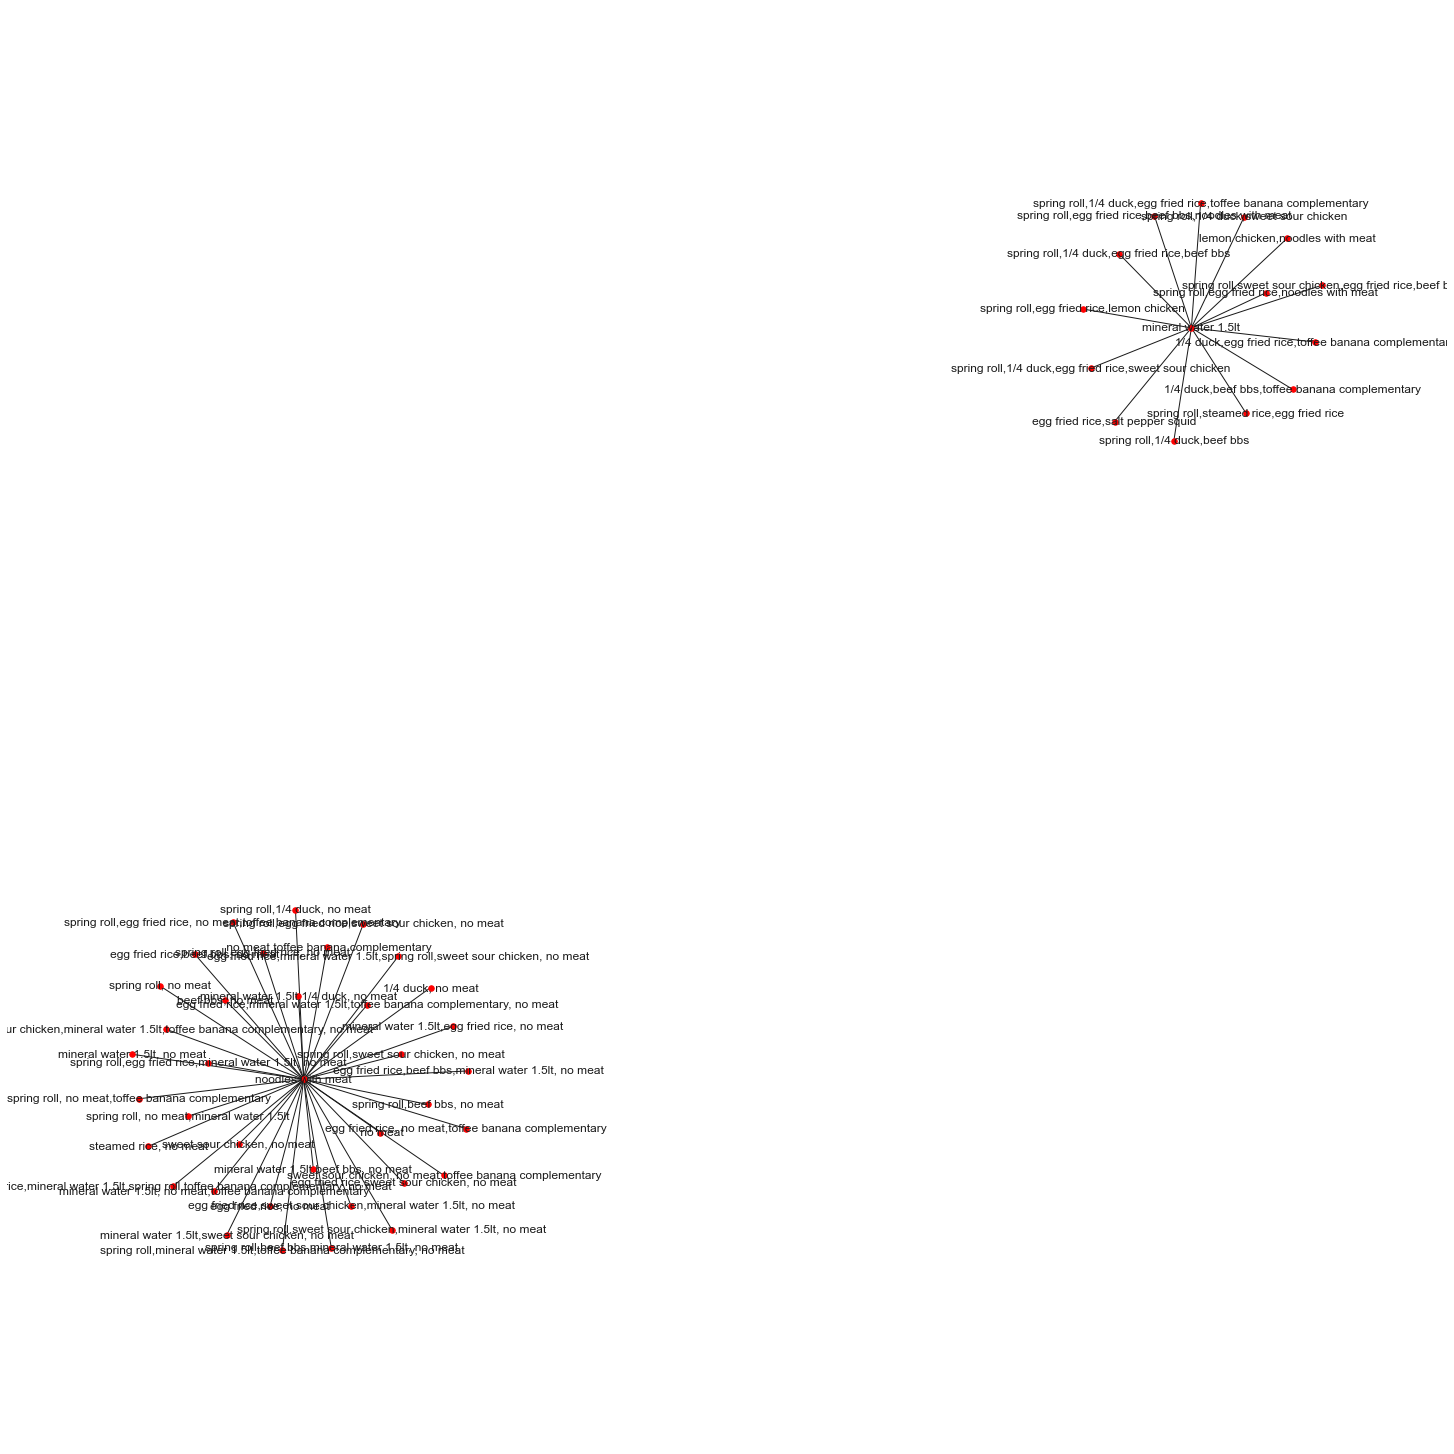

In [141]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)
# Plot
rulesToPlot=rulesToPlot[:50]
fig = plt.figure(figsize=(20, 20)) 
G = nx.from_pandas_edgelist(rulesToPlot, 'LHS', 'RHS')
nx.draw(G, with_labels=True, node_size=30, node_color="red", pos=nx.spring_layout(G))
plt.axis('equal')
plt.show()
#fig.savefig('figure.svg')

<a class="anchor" id="ref">

# `References`
    
</a>

In [ ]:
#https://practicaldatascience.co.uk/data-science/how-to-create-a-simple-product-recommender-system-in-pandas
#https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/
#https://deepnote.com/@code-along-tutorials/Market-Basket-Analysis-in-Python-An-Implementation-with-Online-Retail-Data-6231620b-cba3-4935-bde8-8ce1490868bf    
#https://pbpython.com/market-basket-analysis.html